In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ppxf_functions import (
    load_spectrum,
    process_spectrum,
    rebin_to_log,
    make_noise,
    calculate_velscale_fwhm,
    run_ppxf,
    plot_ppxf,
)

In [2]:
raw = np.load("../SB3_data.npy")       # 2D array (flux × spatial pixel)
waveem = np.load("../SB3_waveem.npy")

window_size = 5
step        = 1
scale       = 0.4   # arcsec per pixel

pix_min, pix_max = 150, 250   
results = []
raw_roi = raw[:, pix_min:pix_max]

for start in range(0, raw_roi.shape[1] - window_size + 1, step):
    end = start + window_size
    spectrum = raw_roi[:, start:end].sum(axis=1)

    # Build DataFrame for this spectrum
    df_spec = pd.DataFrame({
        "waveem": waveem,
        "flux":   spectrum
    })

    # Process, rebin, and run pPXF
    df_cut = process_spectrum(df_spec)
    df_rb, lam, flux_rb, ln_w = rebin_to_log(df_cut)
    
    noise = make_noise(df_rb)
    velscale, fwhm = calculate_velscale_fwhm(ln_w, lam)
    center = start + window_size//2 + pix_min

    # run improved pPXF 
    pp = run_ppxf(lam, fwhm, velscale, df_rb, noise)

    # Compute global center index
    center = start + window_size//2 + pix_min
    print(f'PIXEL: {center}')

    # Store center, rebinned DataFrame, and fit result
    results.append((center, df_rb, pp))


Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      -166       236
 comp.  1:        45       281
 comp.  2:      2000      1000
chi2/DOF: 0.8841; DOF: 1600; degree = -1; mdegree = 10
method = capfit; Jac calls: 10; Func calls: 174; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      10.40       3.4      45   281
Comp:  2           [NII]6583_d      16.48       6.8    2000  1000
-----------------------------------------------------------------
pPXF fit done in 1.26 s
PIXEL: 152
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeI

 Best Fit:       Vel     sigma
 comp.  0:       311        93
 comp.  1:       259       222
 comp.  2:       330         1
chi2/DOF: 0.9676; DOF: 1600; degree = -1; mdegree = 10
method = capfit; Jac calls: 7; Func calls: 125; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      10.40       3.8     259   222
Comp:  2           [NII]6583_d      6.039       3.3     330     1
-----------------------------------------------------------------
pPXF fit done in 1.06 s
PIXEL: 161
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:       280         2
 comp.  1:       236       165
 comp.  2:    

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:        85       201
 comp.  1:      -233        70
 comp.  2:      -375       366
chi2/DOF: 0.4143; DOF: 1600; degree = -1; mdegree = 10
method = capfit; Jac calls: 7; Func calls: 123; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      19.48      0.93    -233    70
Comp:  2           [NII]6583_d      17.70       1.9    -375   366
-----------------------------------------------------------------
pPXF fit done in 1.05 s
PIXEL: 171
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII

 Best Fit:       Vel     sigma
 comp.  0:       -25       409
 comp.  1:        39       239
 comp.  2:       110       134
chi2/DOF: 0.3764; DOF: 1600; degree = -1; mdegree = 10
method = capfit; Jac calls: 7; Func calls: 124; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      9.583       1.3      39   239
Comp:  2           [NII]6583_d      4.086       1.3     110   134
-----------------------------------------------------------------
pPXF fit done in 0.96 s
PIXEL: 180
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      -117       440
 comp.  1:        11       208
 comp.  2:    

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      -214       577
 comp.  1:       108       249
 comp.  2:       127       143
chi2/DOF: 0.2667; DOF: 1600; degree = -1; mdegree = 10
method = capfit; Jac calls: 6; Func calls: 104; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 7/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      2.961      0.60     108   249
Comp:  2           [NII]6583_d      1.907      0.62     127   143
-----------------------------------------------------------------
pPXF fit done in 0.79 s
PIXEL: 190
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII

 Best Fit:       Vel     sigma
 comp.  0:       131       615
 comp.  1:       139       172
 comp.  2:       128       150
chi2/DOF: 0.01493; DOF: 1600; degree = -1; mdegree = 10
method = capfit; Jac calls: 9; Func calls: 158; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 4/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      12.69       2.4     139   172
Comp:  2           [NII]6583_d      10.69       2.9     128   150
-----------------------------------------------------------------
pPXF fit done in 1.28 s
PIXEL: 199
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:       134       469
 comp.  1:       125       201
 comp.  2:   

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:        78       517
 comp.  1:       188       228
 comp.  2:       142       191
chi2/DOF: 0.1797; DOF: 1600; degree = -1; mdegree = 10
method = capfit; Jac calls: 6; Func calls: 104; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 4/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      6.688       1.1     188   228
Comp:  2           [NII]6583_d      5.047       1.4     142   191
-----------------------------------------------------------------
pPXF fit done in 0.94 s
PIXEL: 209
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII

 Best Fit:       Vel     sigma
 comp.  0:       650       284
 comp.  1:      -221       148
 comp.  2:      -324       447
chi2/DOF: 0.6391; DOF: 1600; degree = -1; mdegree = 10
method = capfit; Jac calls: 7; Func calls: 123; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 4/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      8.474       2.1    -221   148
Comp:  2           [NII]6583_d      15.19       4.0    -324   447
-----------------------------------------------------------------
pPXF fit done in 0.93 s
PIXEL: 218
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:       564       410
 comp.  1:      -221       139
 comp.  2:    

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      -320      1000
 comp.  1:       176       116
 comp.  2:       204       220
chi2/DOF: 0.6896; DOF: 1600; degree = -1; mdegree = 10
method = capfit; Jac calls: 9; Func calls: 157; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      18.79       1.3     176   116
Comp:  2           [NII]6583_d      12.21       2.0     204   220
-----------------------------------------------------------------
pPXF fit done in 1.39 s
PIXEL: 228
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII

 Best Fit:       Vel     sigma
 comp.  0:      -141       223
 comp.  1:      -271       118
 comp.  2:        -9         1
chi2/DOF: 0.6235; DOF: 1600; degree = -1; mdegree = 10
method = capfit; Jac calls: 8; Func calls: 138; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      20.11       2.4    -271   118
Comp:  2           [NII]6583_d      7.487       2.6      -9     1
-----------------------------------------------------------------
pPXF fit done in 1.41 s
PIXEL: 237
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      -313       964
 comp.  1:      -329         1
 comp.  2:    

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:       154         1
 comp.  1:         0       200
 comp.  2:        -0       200
chi2/DOF: 0.9438; DOF: 1600; degree = -1; mdegree = 10
method = capfit; Jac calls: 5; Func calls: 87; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 2/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      0.000       4.2       0   200
Comp:  2           [NII]6583_d      0.000       5.3      -0   200
-----------------------------------------------------------------
pPXF fit done in 0.76 s
PIXEL: 247


Peak flux at 194 px


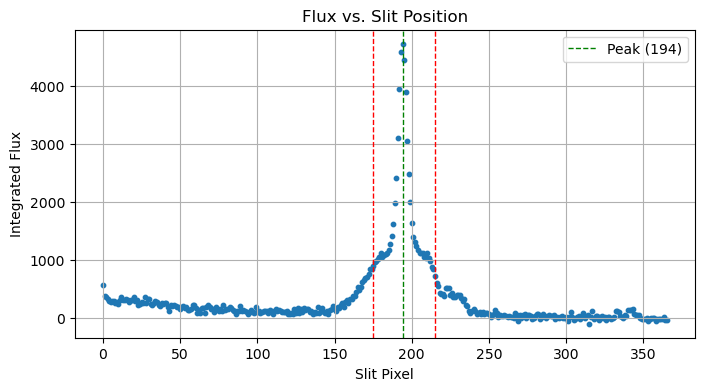

In [3]:
# raw.shape == (n_wave, n_spatial)
spatial_flux = raw.sum(axis=0)       # total flux in each slit column
slit_pixels  = np.arange(raw.shape[1])

# Only look between 150 and 250
search_range = slice(150, 251)
peak_rel = np.argmax(spatial_flux[search_range])
peak = slit_pixels[search_range][peak_rel]

print(f"Peak flux at {peak} px")

plt.figure(figsize=(8, 4))
plt.axvline(peak, color='green', linestyle='--', linewidth=1,
            label=f'Peak ({peak})')
plt.axvline(175, color='red', linestyle='--', linewidth=1)
plt.axvline(215, color='red', linestyle='--', linewidth=1)
plt.scatter(slit_pixels, spatial_flux, s=10)
plt.xlabel("Slit Pixel")
plt.ylabel("Integrated Flux")
plt.title("Flux vs. Slit Position")
plt.grid(True)
plt.legend()
plt.show()


Window centre: 177


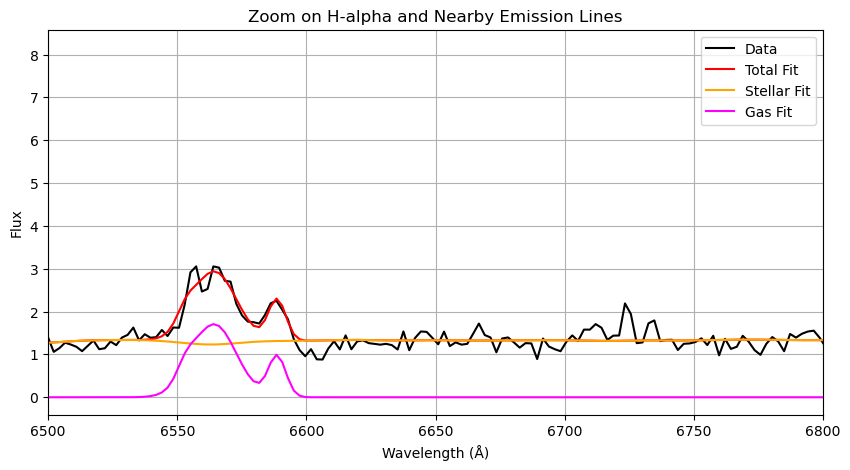

σ (km/s): 372.15

Window centre: 178


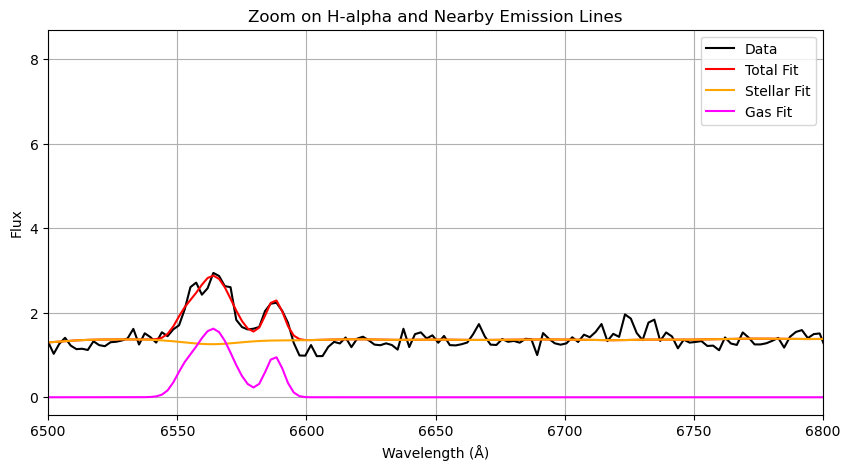

σ (km/s): 310.77

Window centre: 179


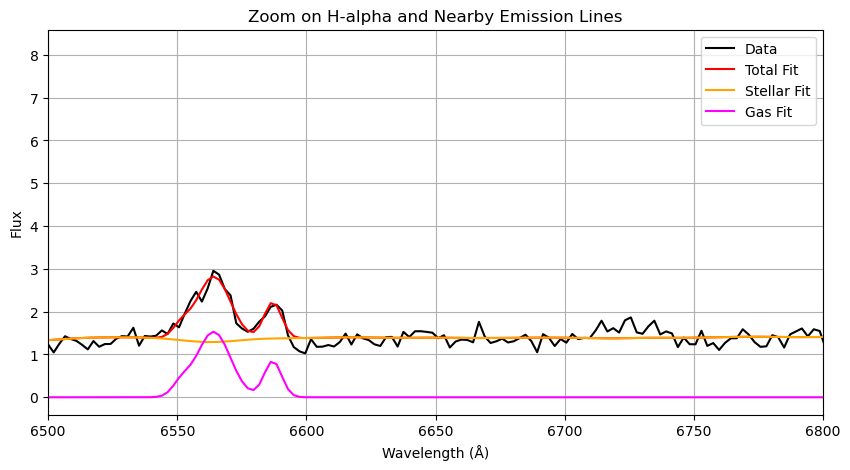

σ (km/s): 272.72

Window centre: 180


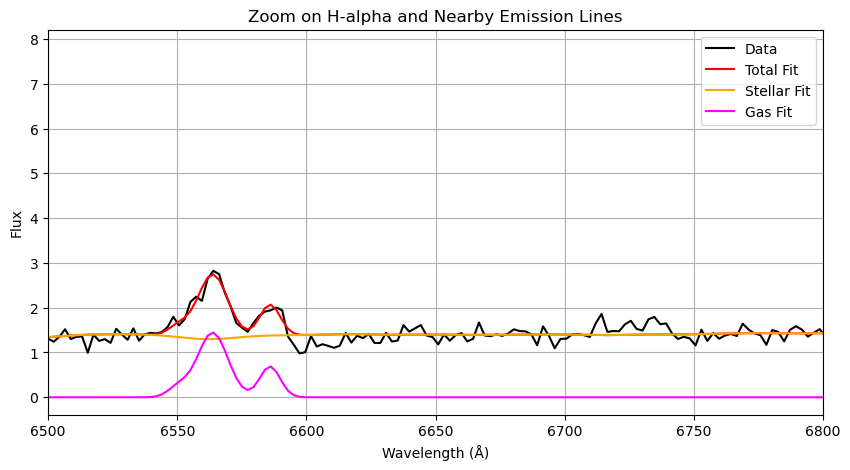

σ (km/s): 239.11

Window centre: 181


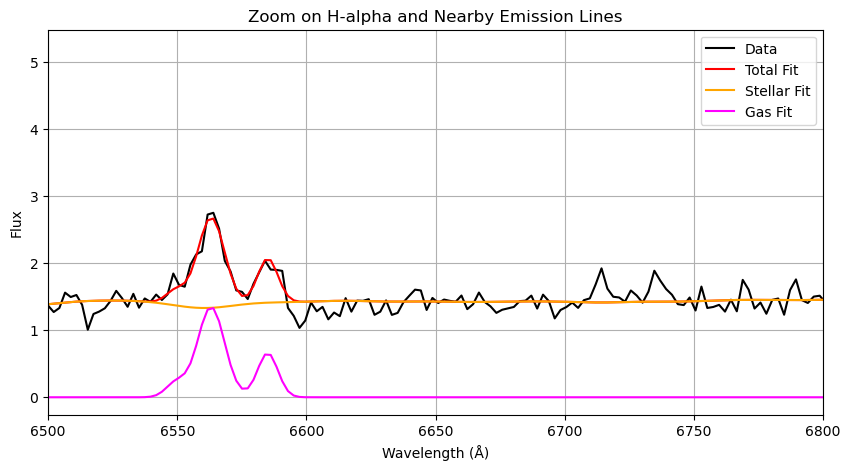

σ (km/s): 207.66

Window centre: 182


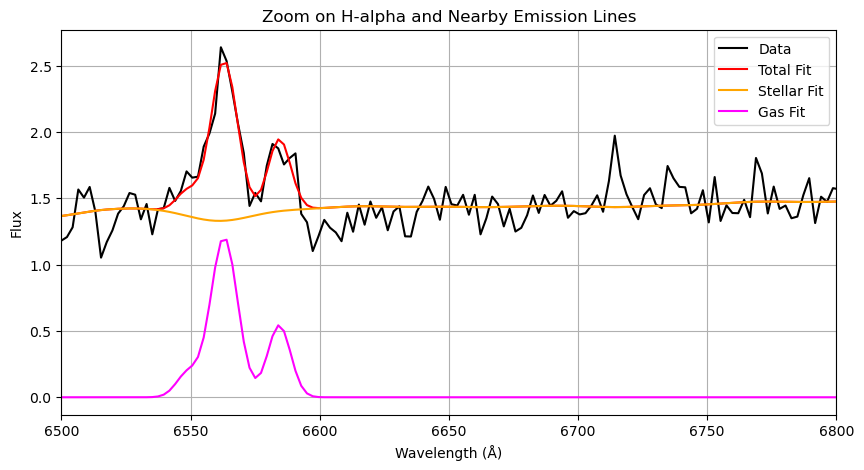

σ (km/s): 205.49

Window centre: 183


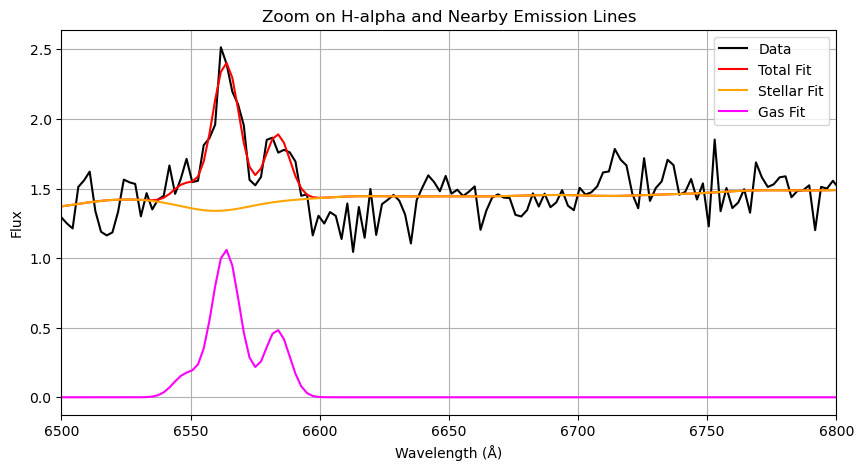

σ (km/s): 211.67

Window centre: 184


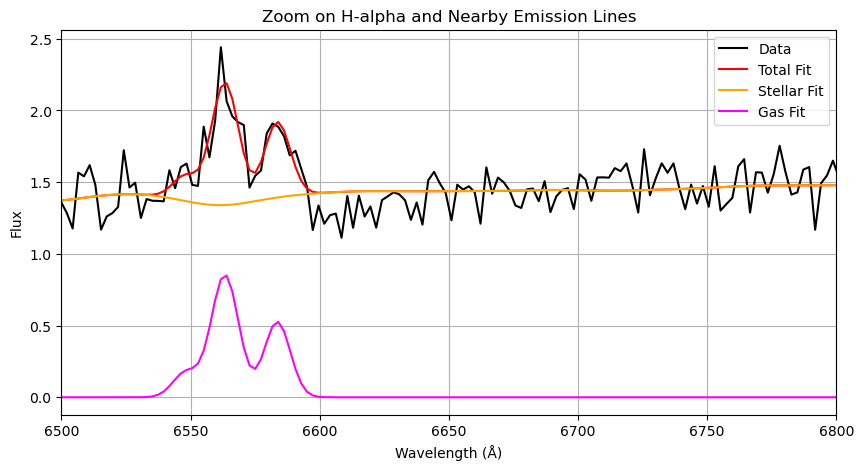

σ (km/s): 209.89

Window centre: 185


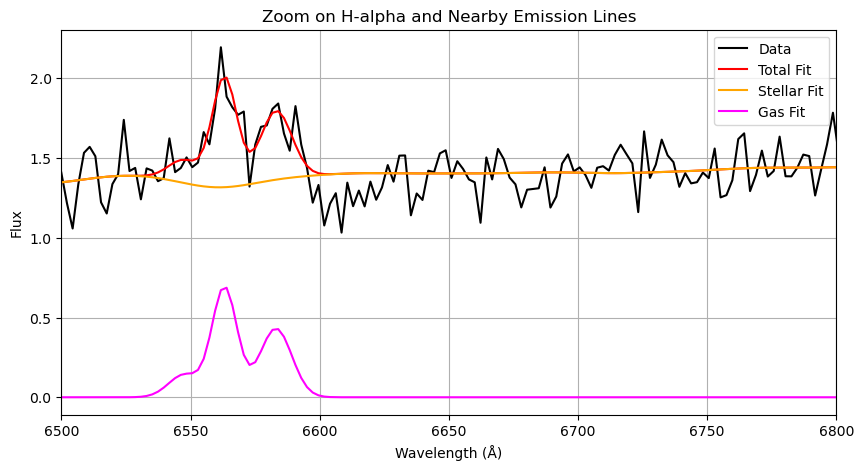

σ (km/s): 185.66

Window centre: 186


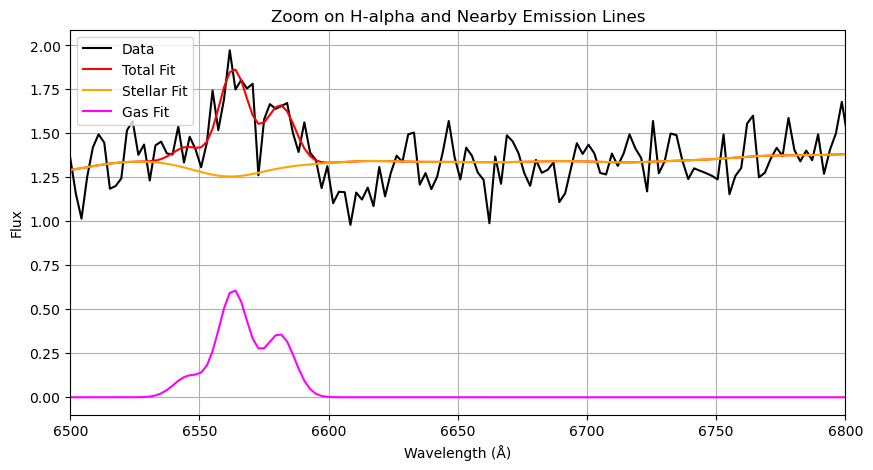

σ (km/s): 235.80

Window centre: 187


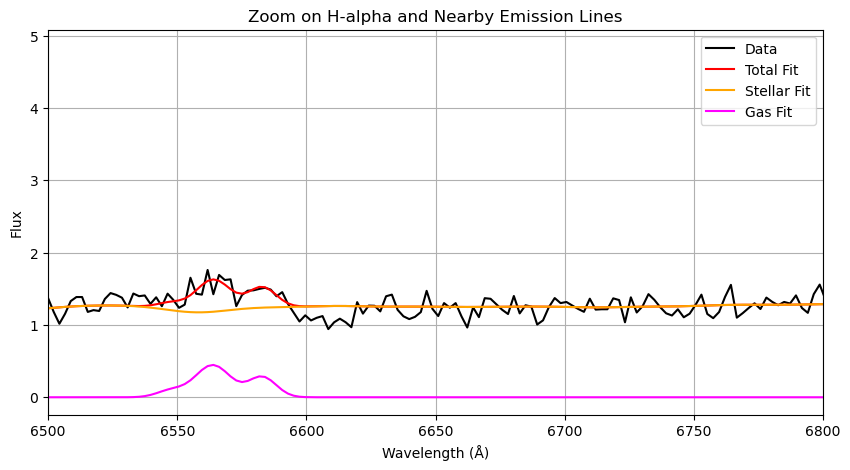

σ (km/s): 288.00

Window centre: 188


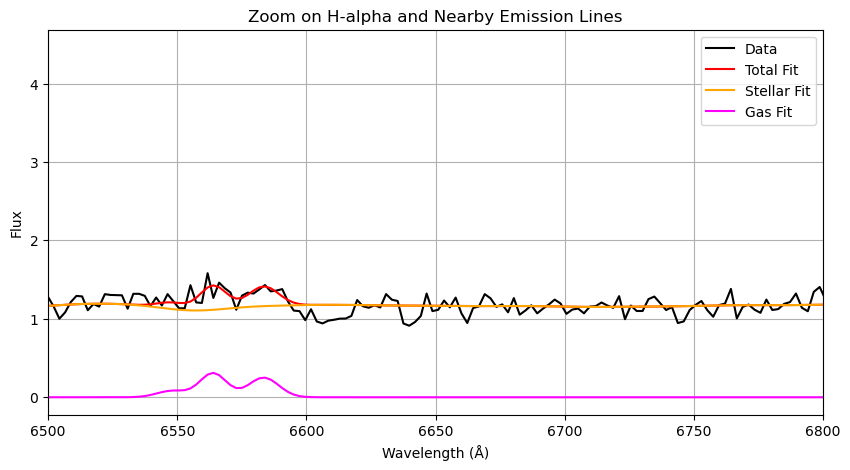

σ (km/s): 203.80

Window centre: 189


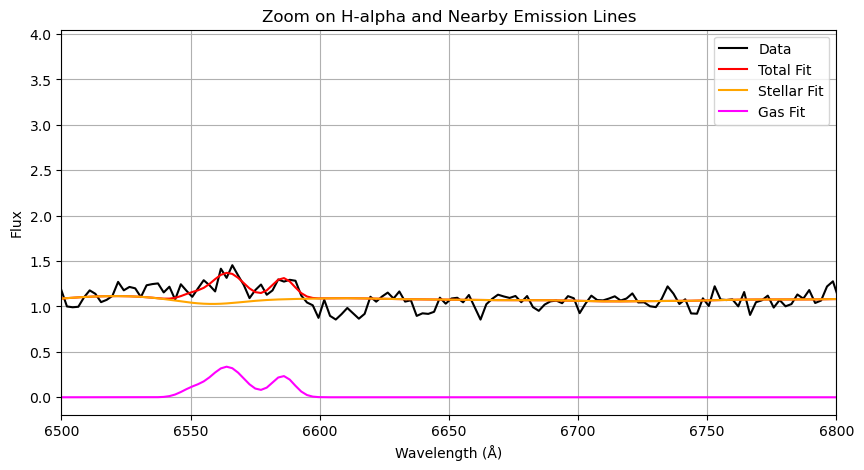

σ (km/s): 275.61

Window centre: 190


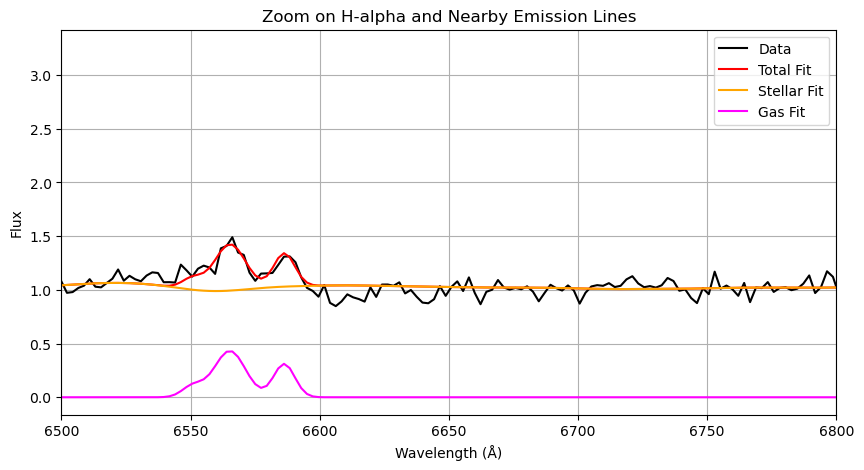

σ (km/s): 249.32

Window centre: 191


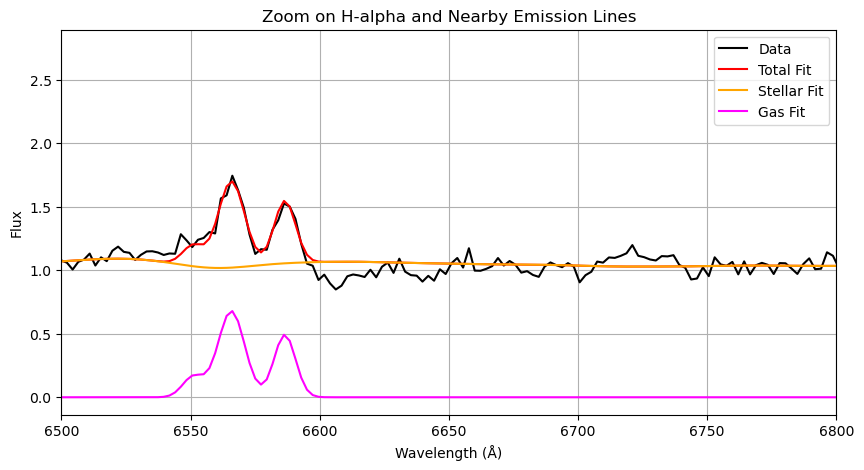

σ (km/s): 202.83

Window centre: 192


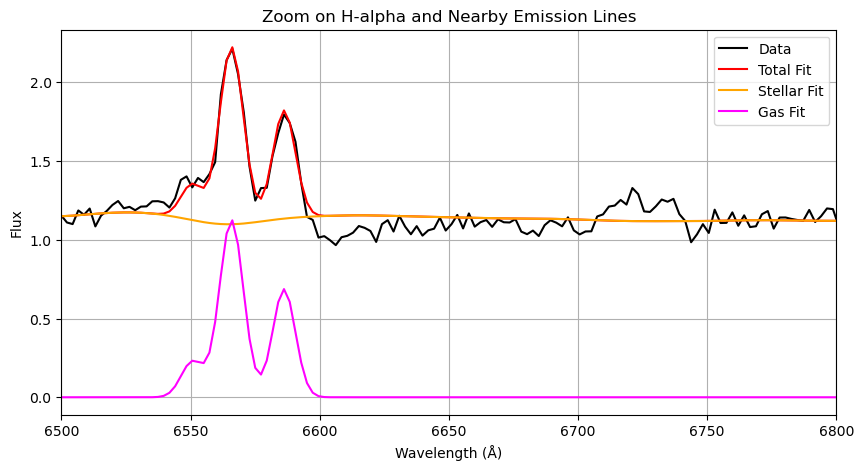

σ (km/s): 175.01

Window centre: 193


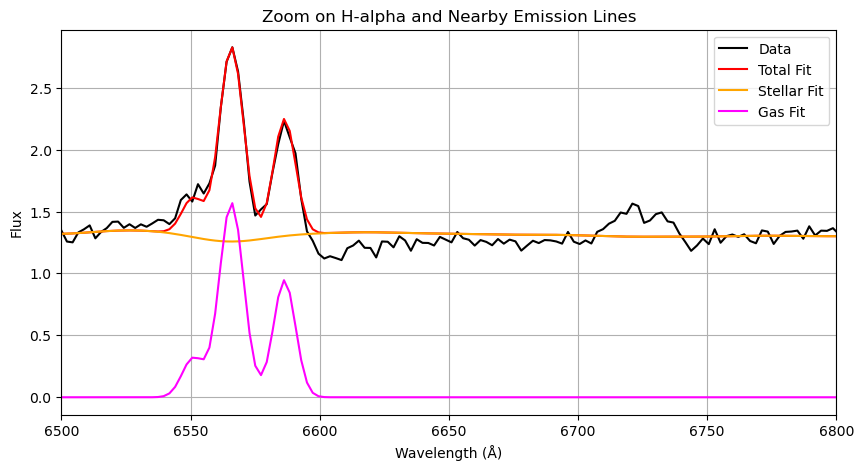

σ (km/s): 176.76

Window centre: 194


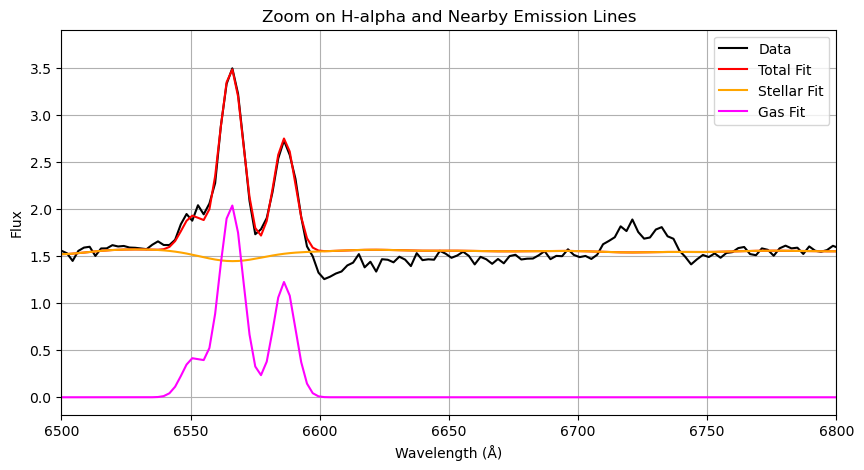

σ (km/s): 176.76

Window centre: 195


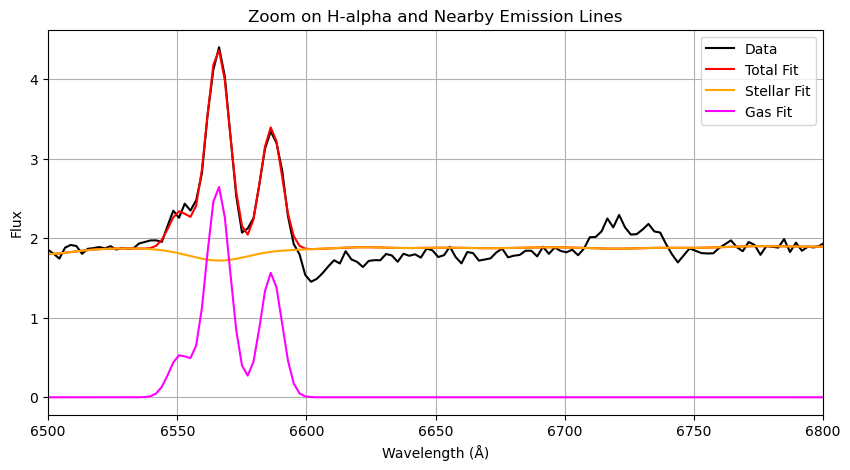

σ (km/s): 173.60

Window centre: 196


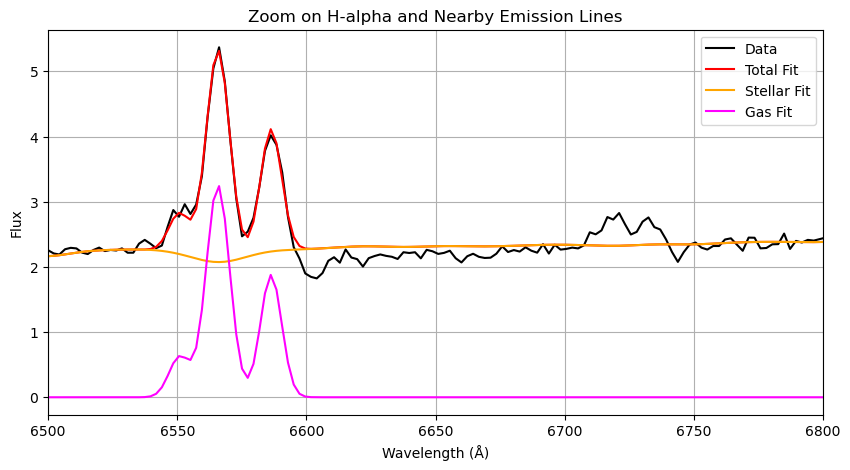

σ (km/s): 168.52

Window centre: 197


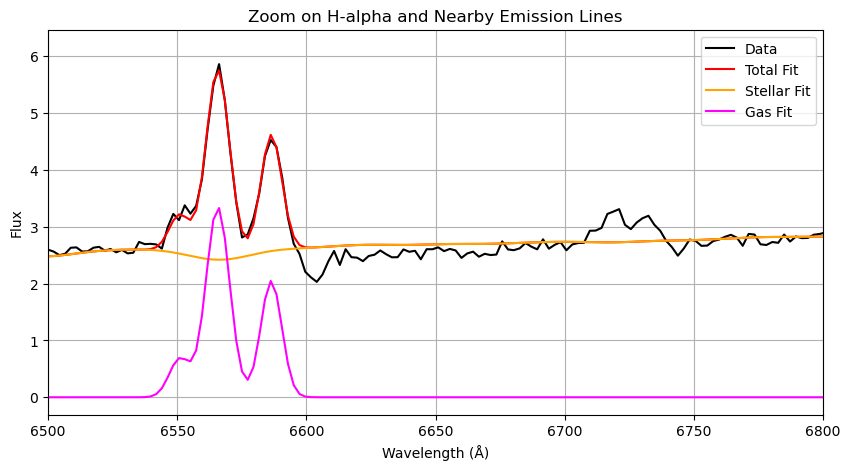

σ (km/s): 170.60

Window centre: 198


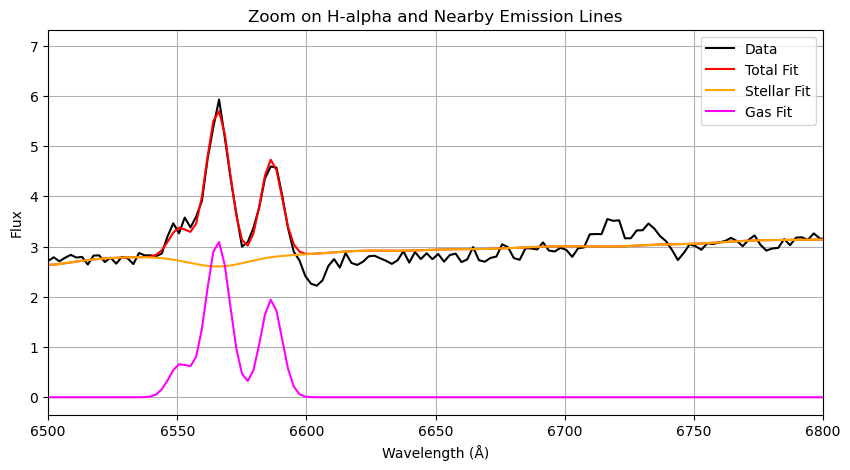

σ (km/s): 175.78

Window centre: 199


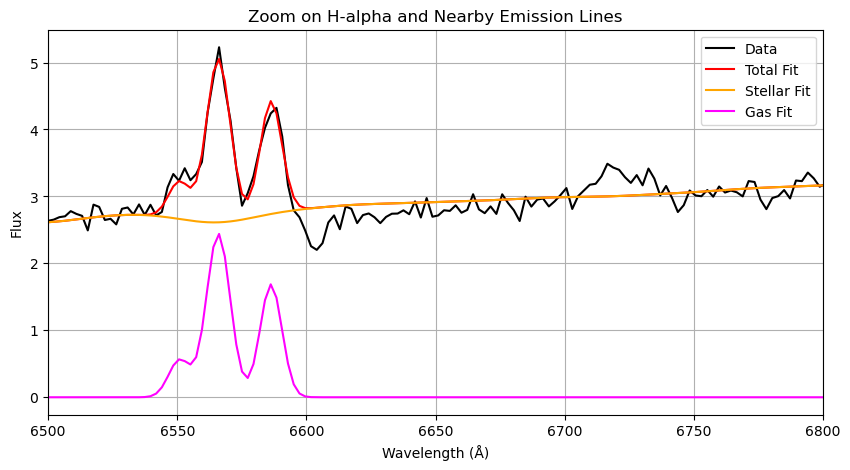

σ (km/s): 171.90

Window centre: 200


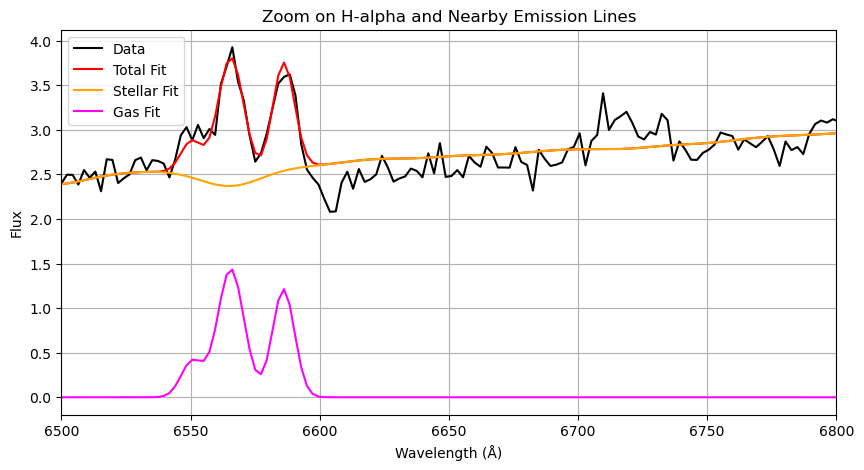

σ (km/s): 201.36

Window centre: 201


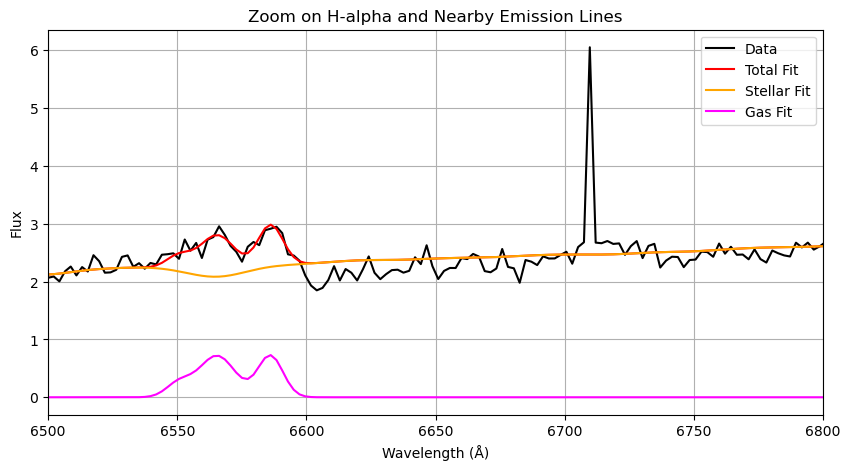

σ (km/s): 296.78

Window centre: 202


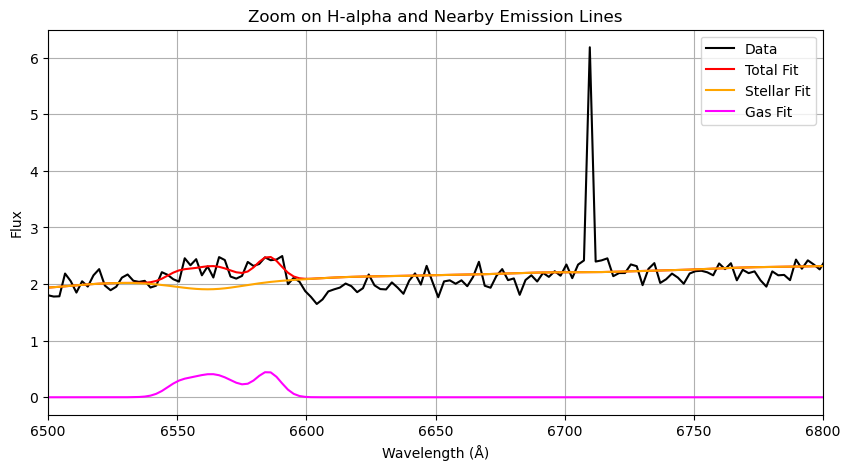

σ (km/s): 403.72

Window centre: 203


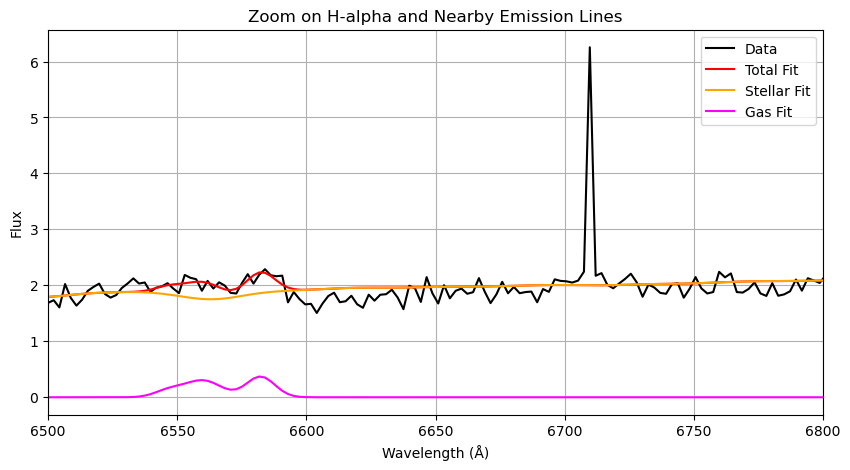

σ (km/s): 296.19

Window centre: 204


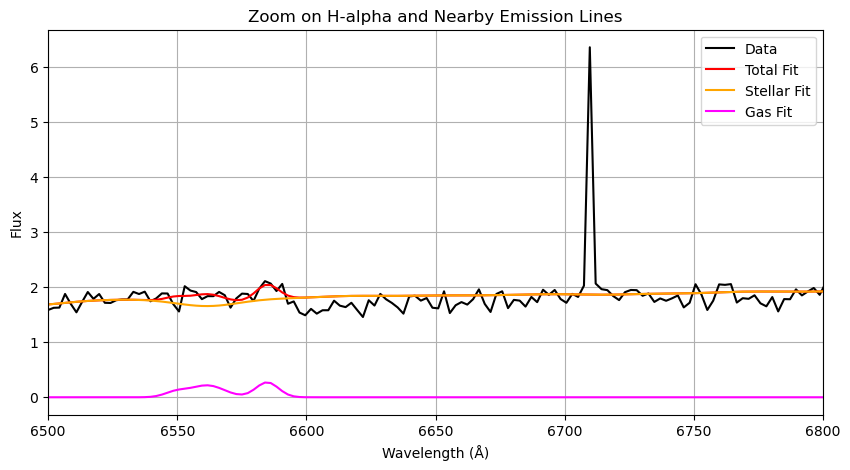

σ (km/s): 278.40

Window centre: 205


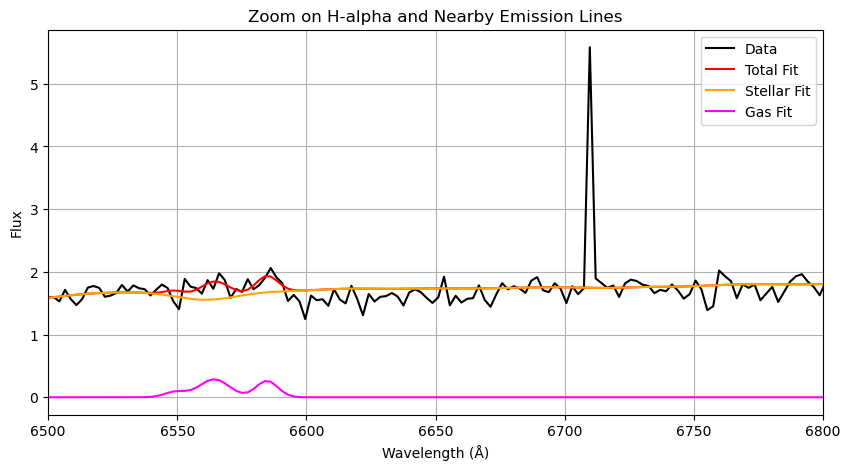

σ (km/s): 235.66

Window centre: 206


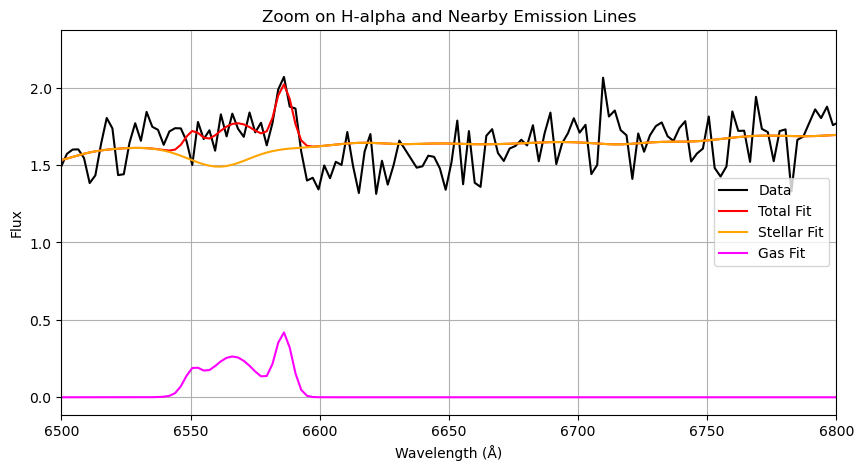

σ (km/s): 395.32

Window centre: 207


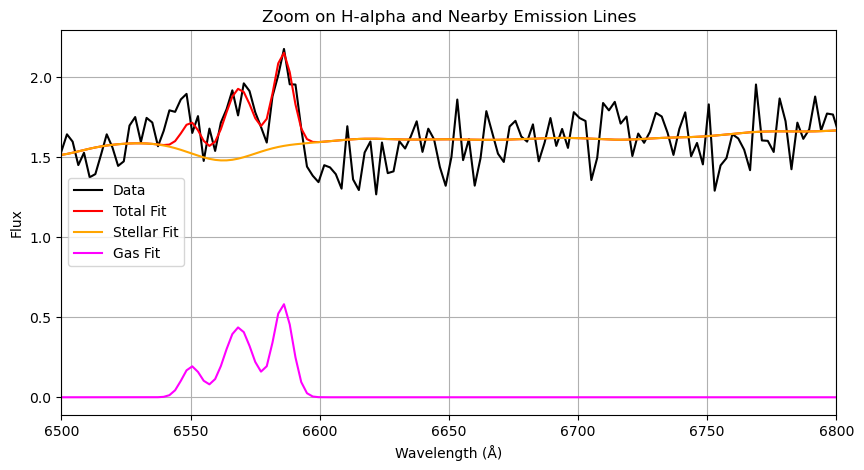

σ (km/s): 213.67

Window centre: 208


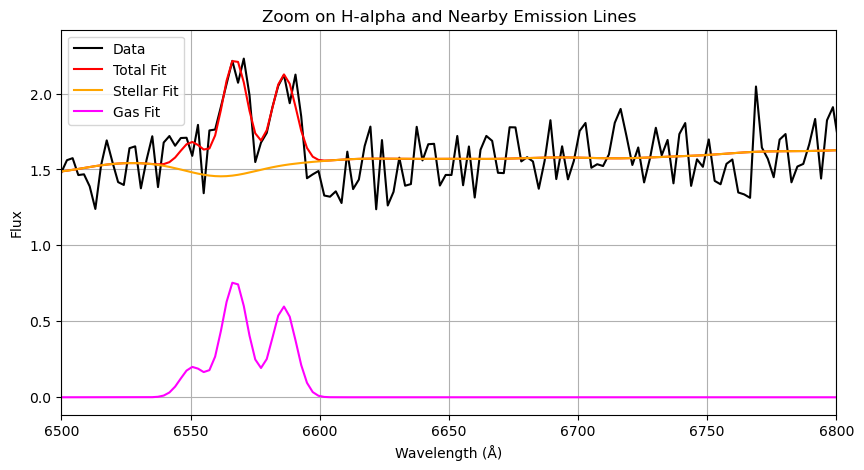

σ (km/s): 191.27

Window centre: 209


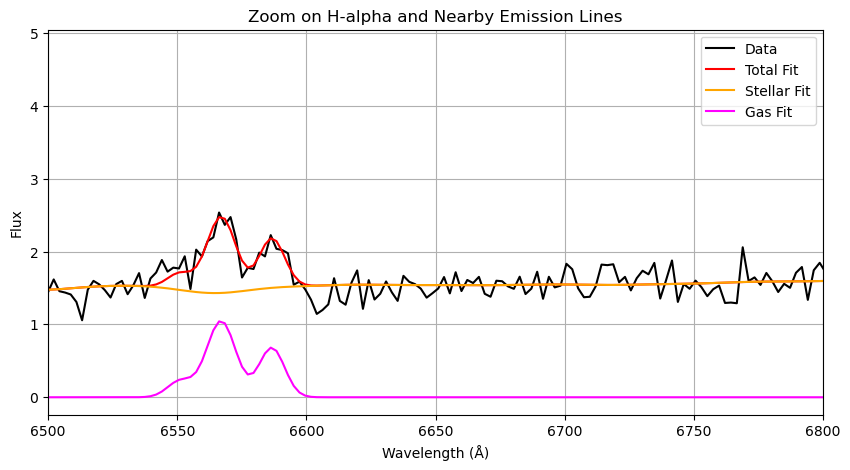

σ (km/s): 227.83

Window centre: 210


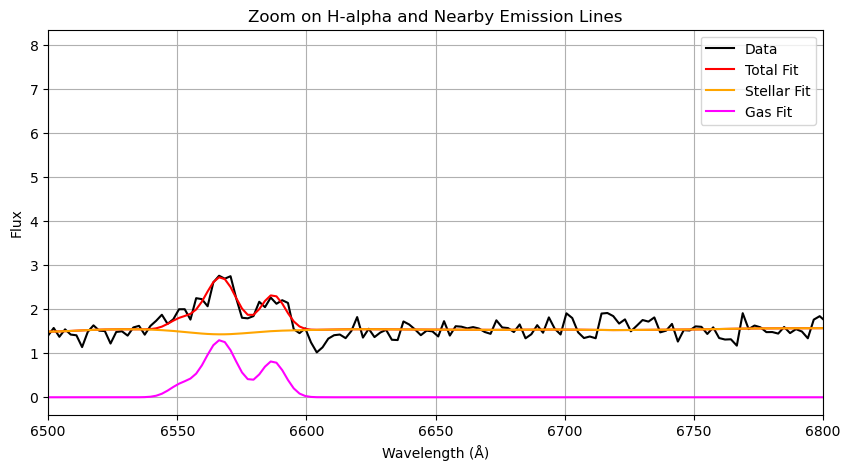

σ (km/s): 255.27

Window centre: 211


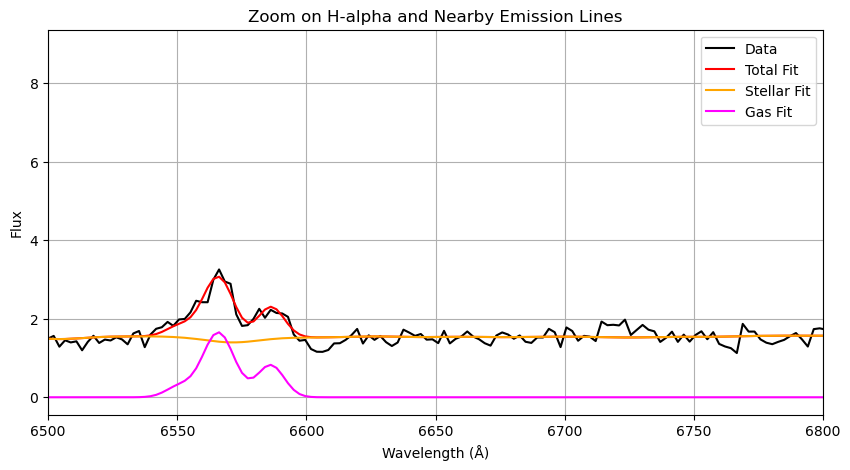

σ (km/s): 251.81

Window centre: 212


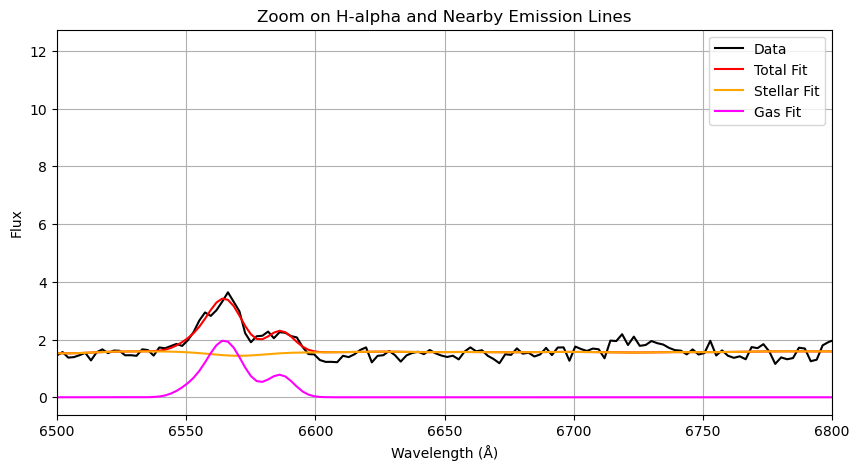

σ (km/s): 292.08

Window centre: 213


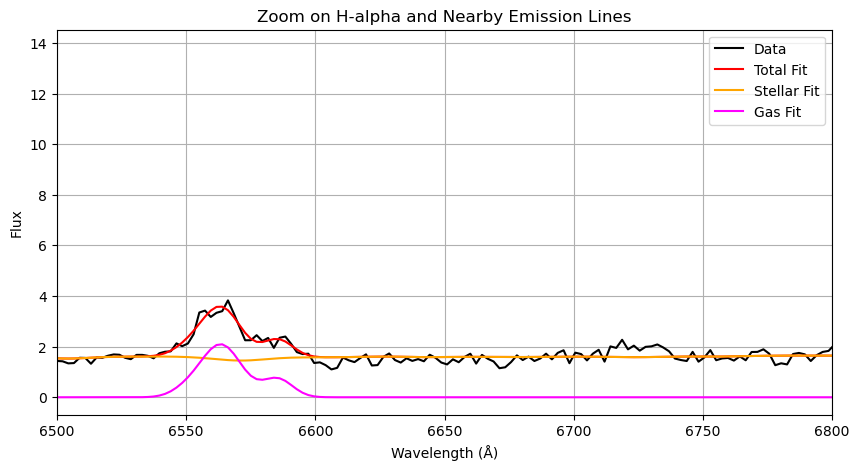

σ (km/s): 338.44

Window centre: 214


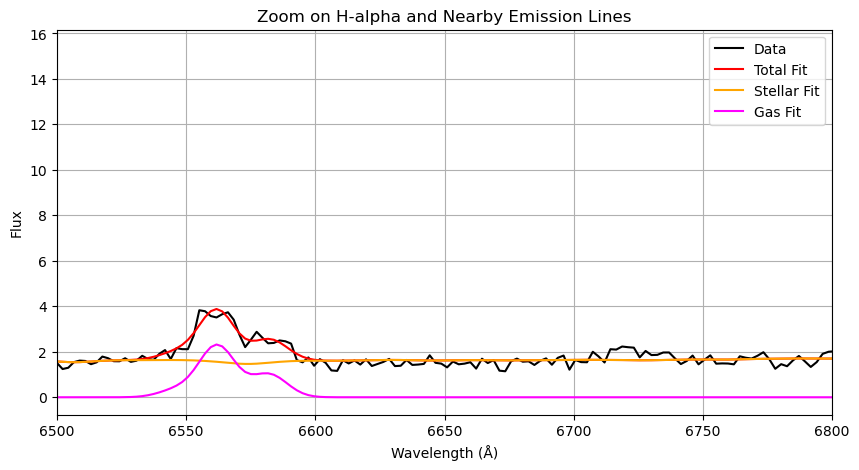

σ (km/s): 295.74

Window centre: 215


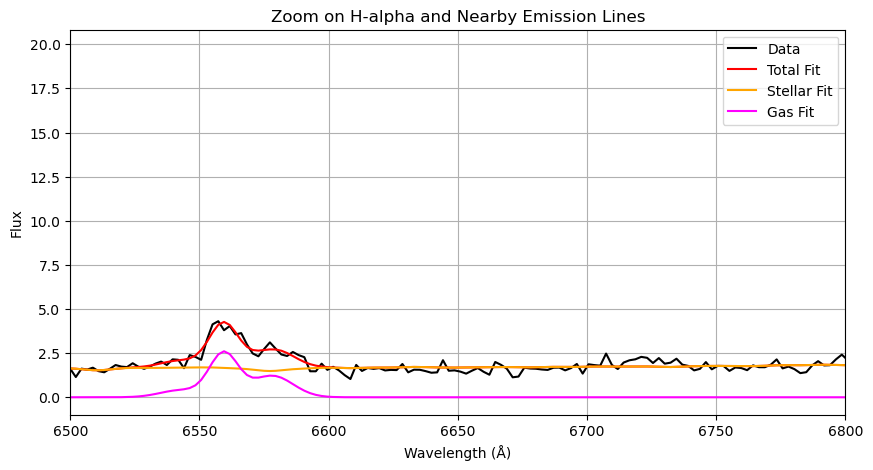

σ (km/s): 225.35

Window centre: 216


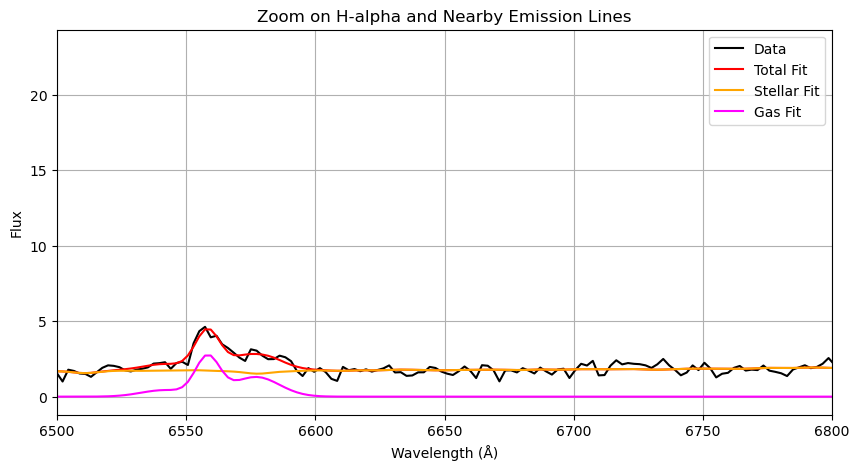

σ (km/s): 178.89

Window centre: 217


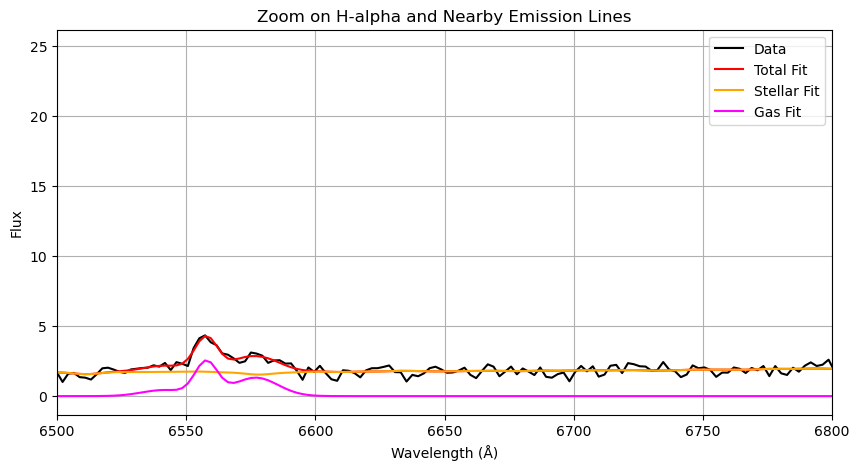

σ (km/s): 160.19

Window centre: 218


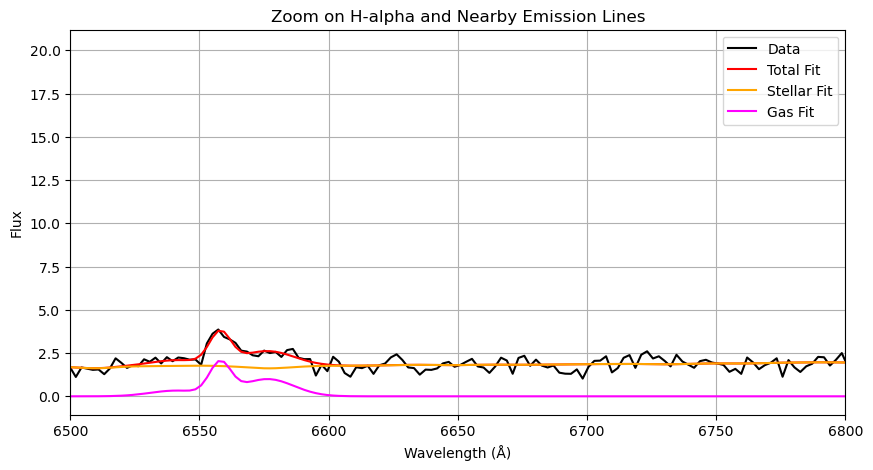

σ (km/s): 147.70

Window centre: 219


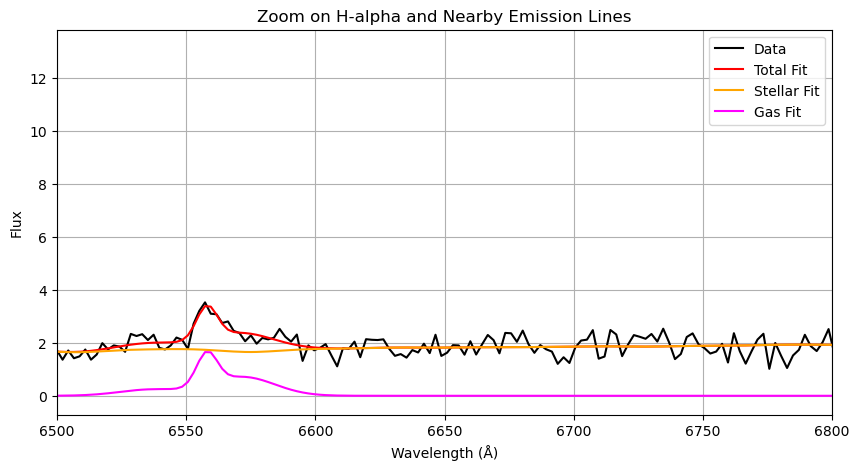

σ (km/s): 138.74

Window centre: 220


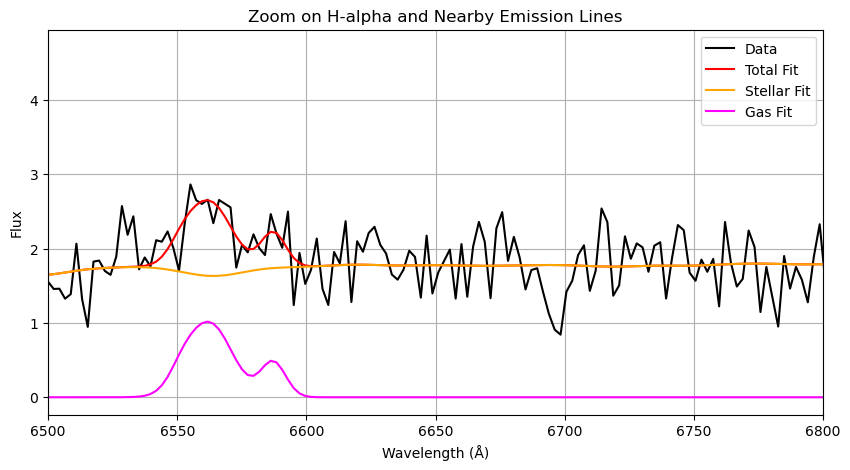

σ (km/s): 385.57

Window centre: 221


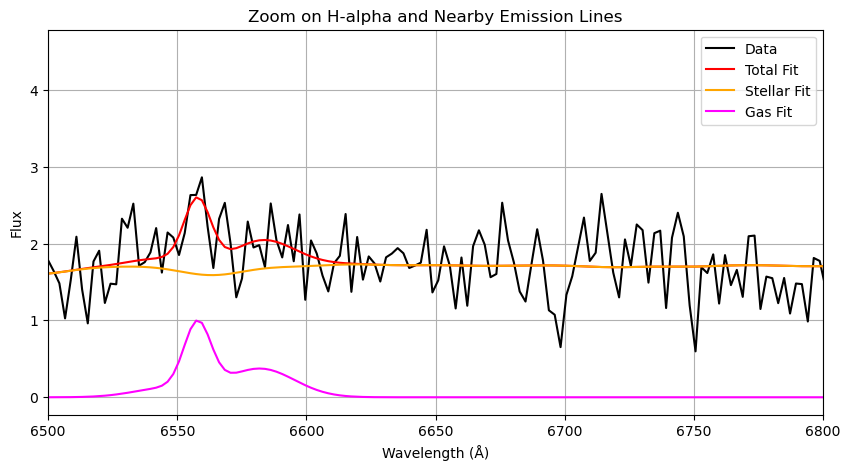

σ (km/s): 205.17

Window centre: 222


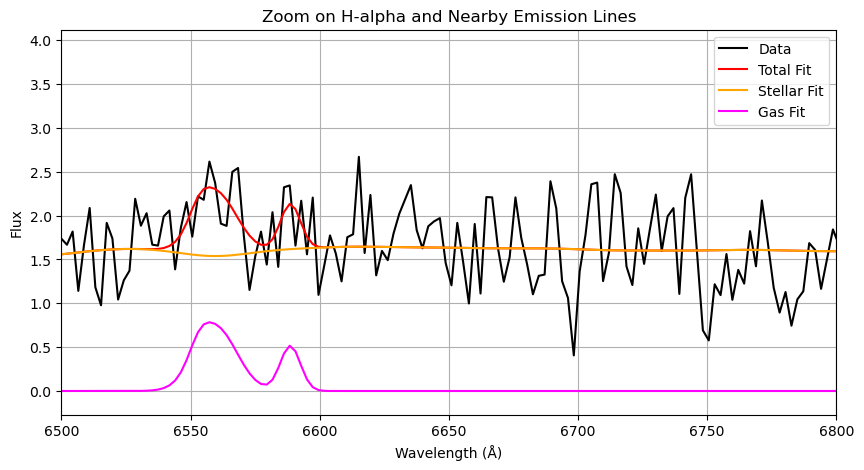

σ (km/s): 351.70

Window centre: 223


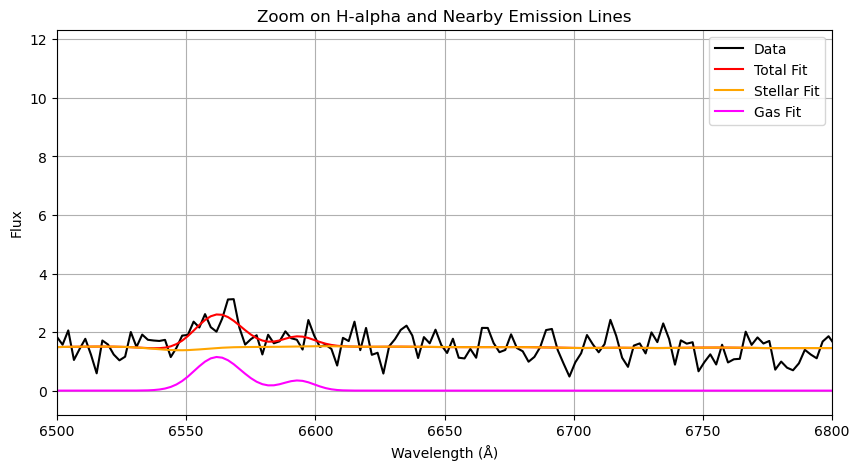

σ (km/s): 389.98

Window centre: 224


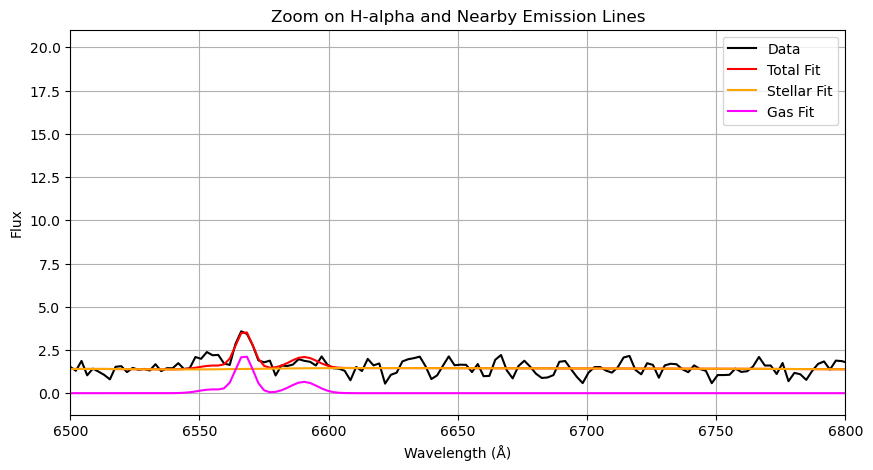

σ (km/s): 92.34

Window centre: 225


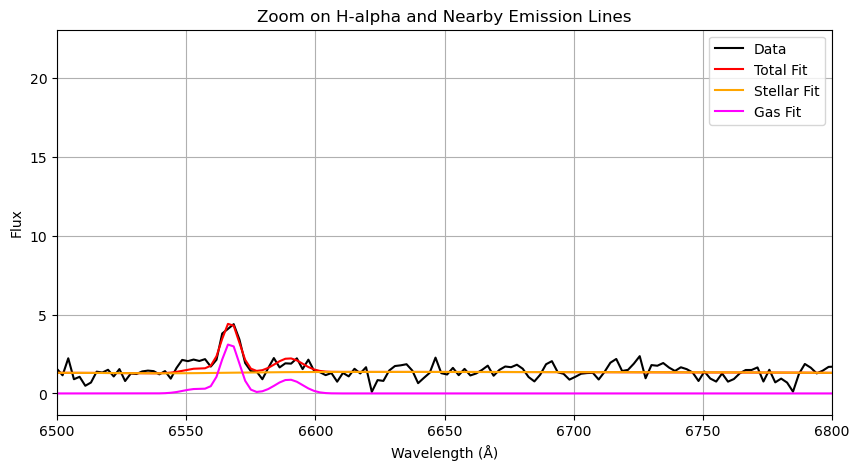

σ (km/s): 101.44

Window centre: 226


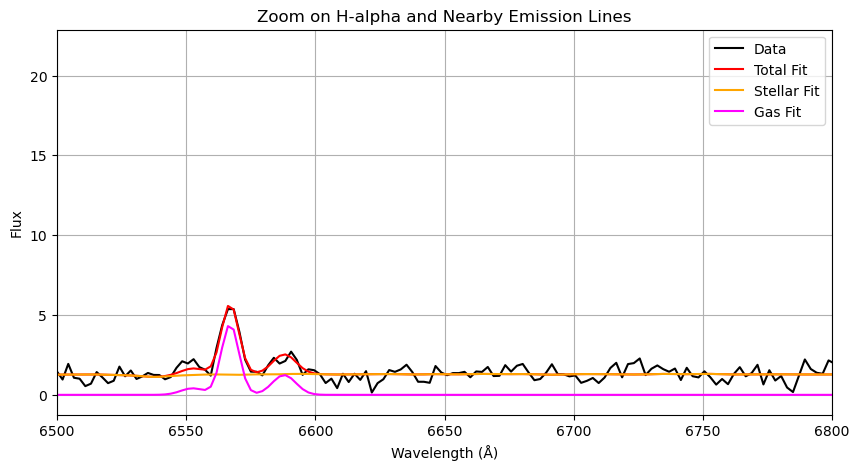

σ (km/s): 97.98

Window centre: 227


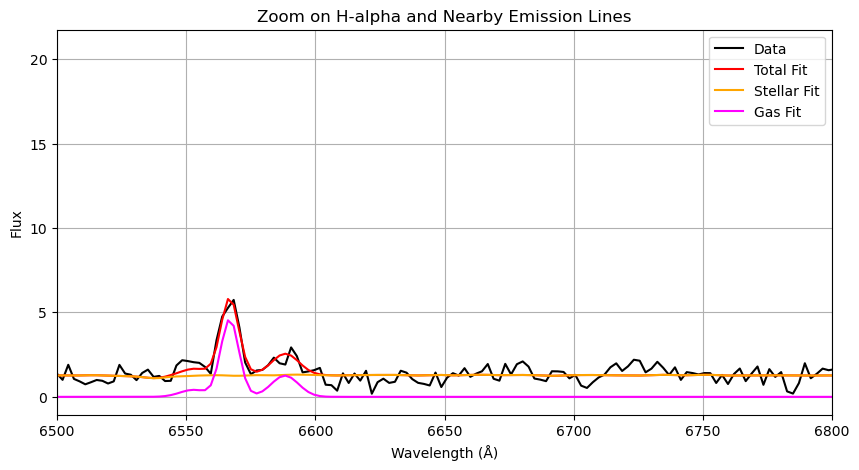

σ (km/s): 105.02

Window centre: 228


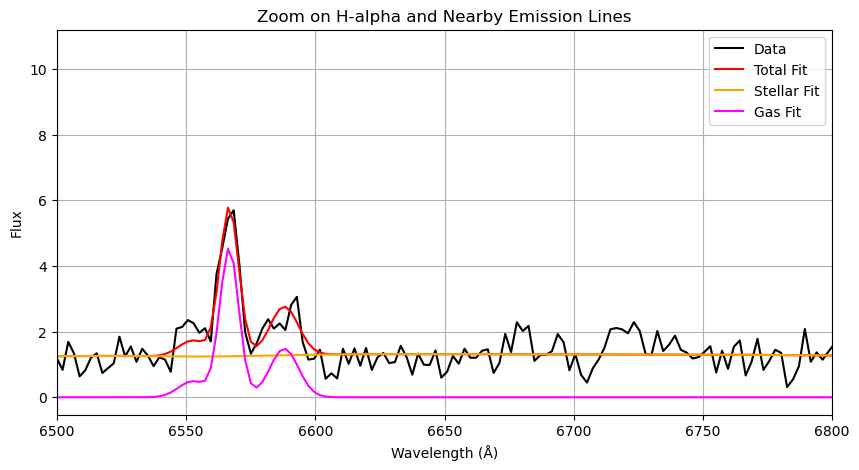

σ (km/s): 115.94

Window centre: 229


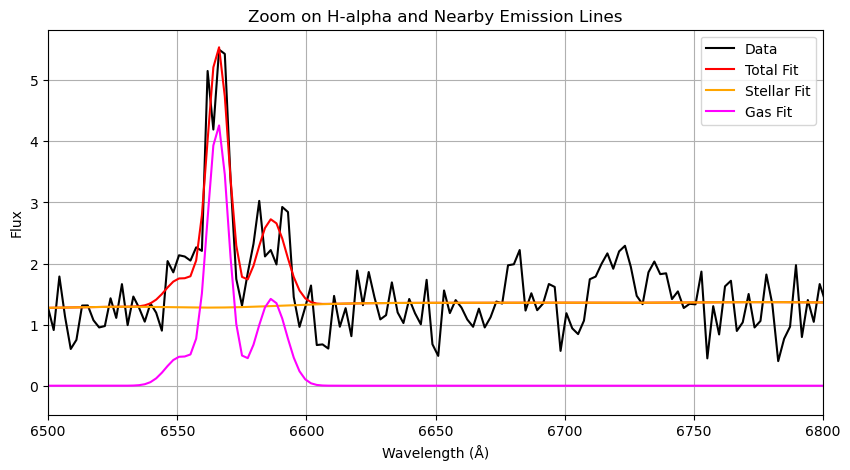

σ (km/s): 142.46

Window centre: 230


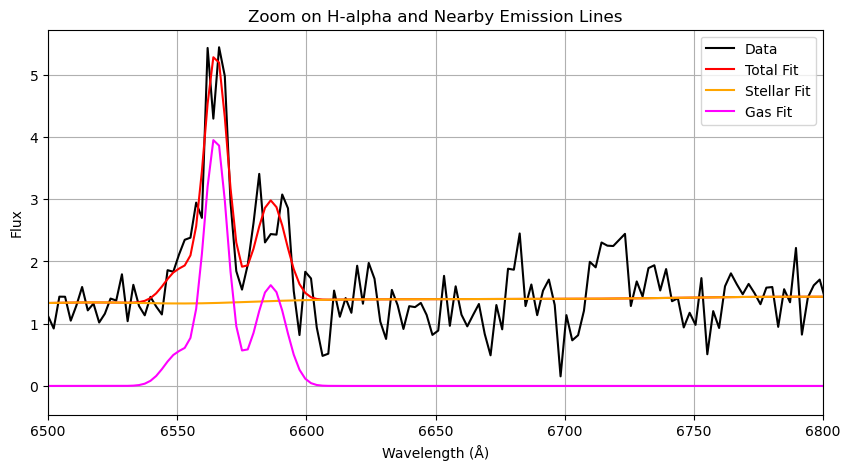

σ (km/s): 166.50

Window centre: 231


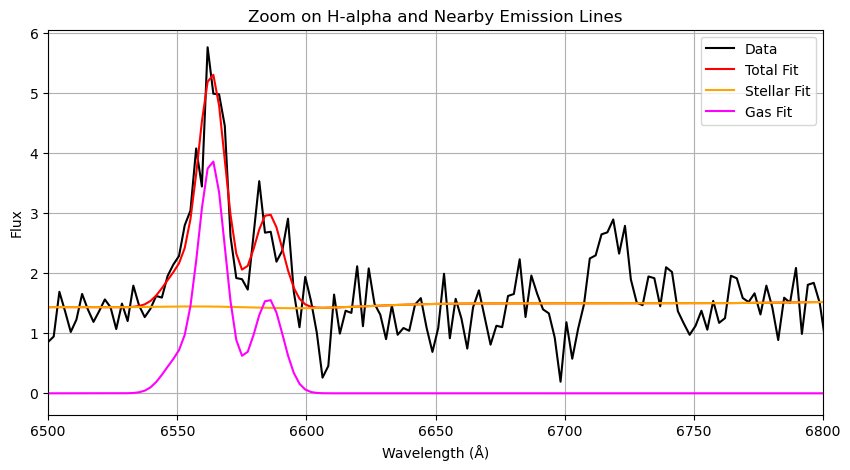

σ (km/s): 207.12

Window centre: 232


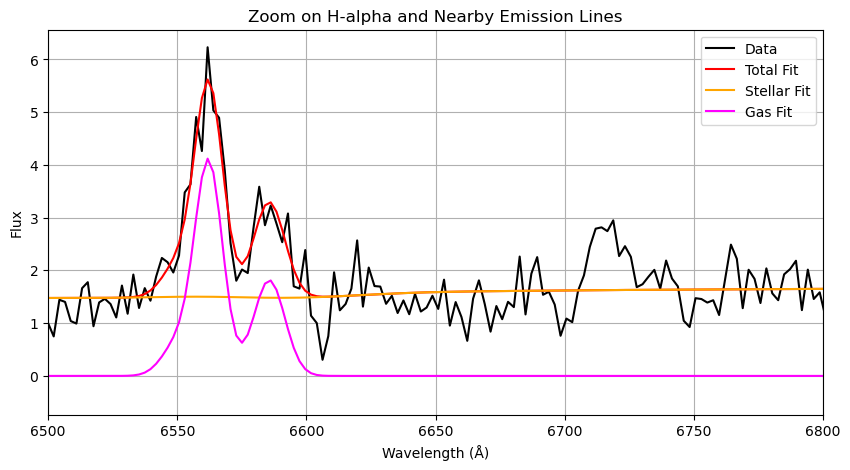

σ (km/s): 215.30

Window centre: 233


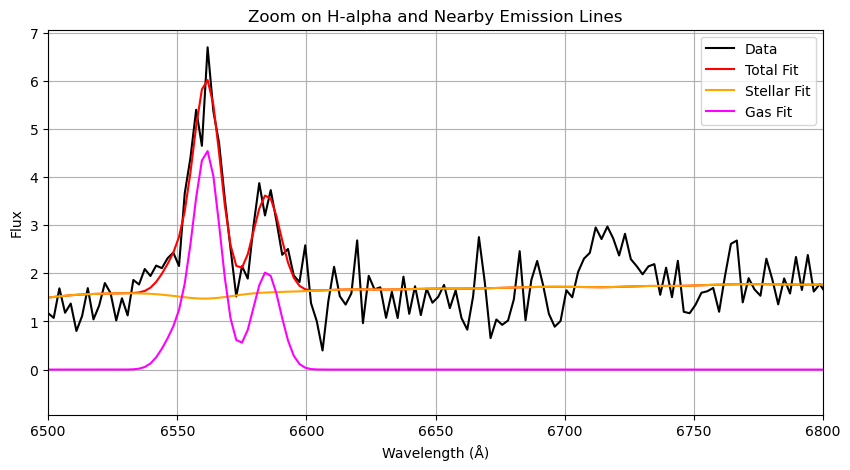

σ (km/s): 211.46

Window centre: 234


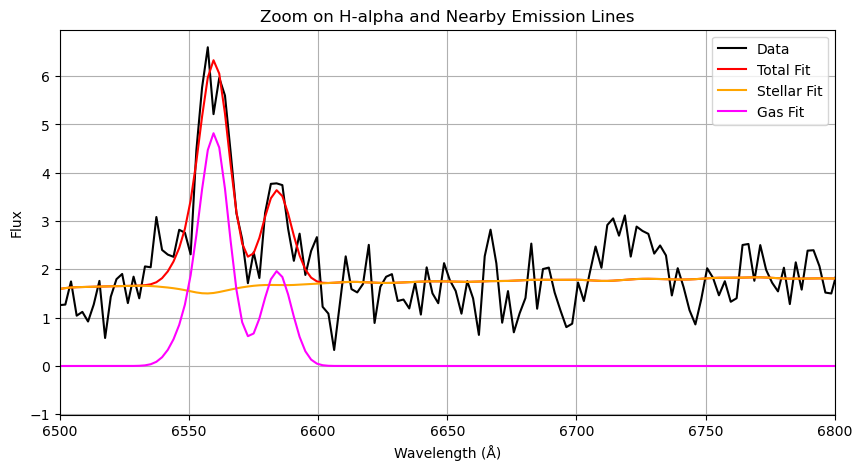

σ (km/s): 230.22

Window centre: 235


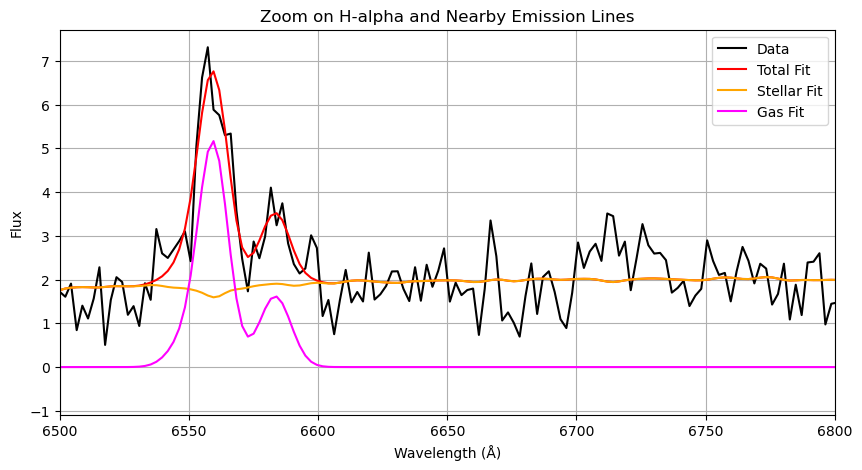

σ (km/s): 233.73

Window centre: 236


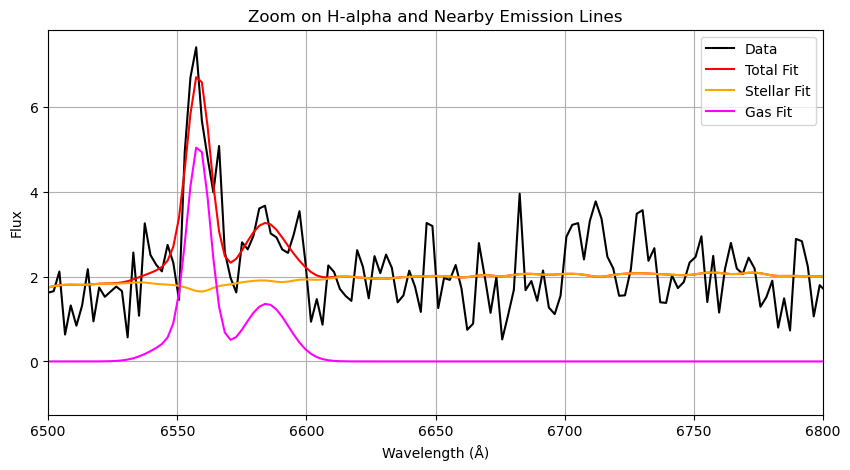

σ (km/s): 168.85

Window centre: 237


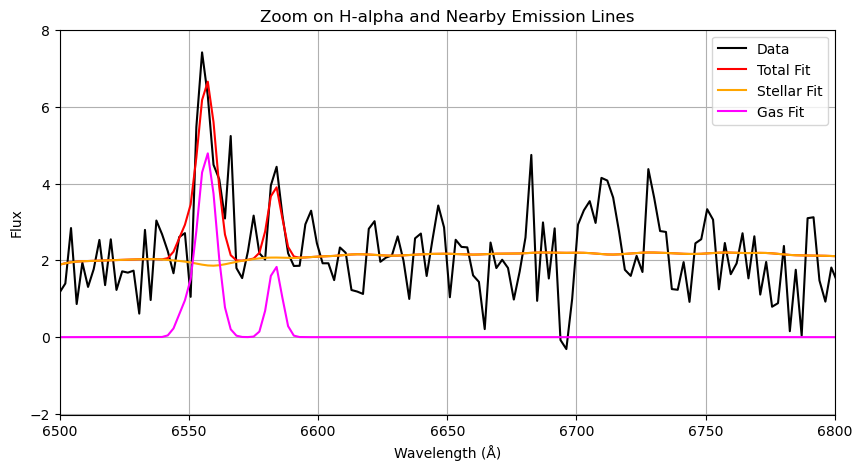

σ (km/s): 118.46

Window centre: 238


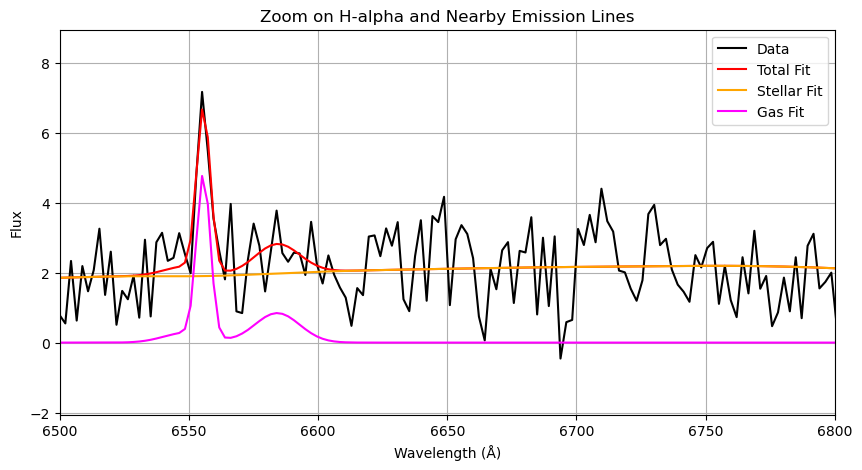

σ (km/s): 1.01

Window centre: 239


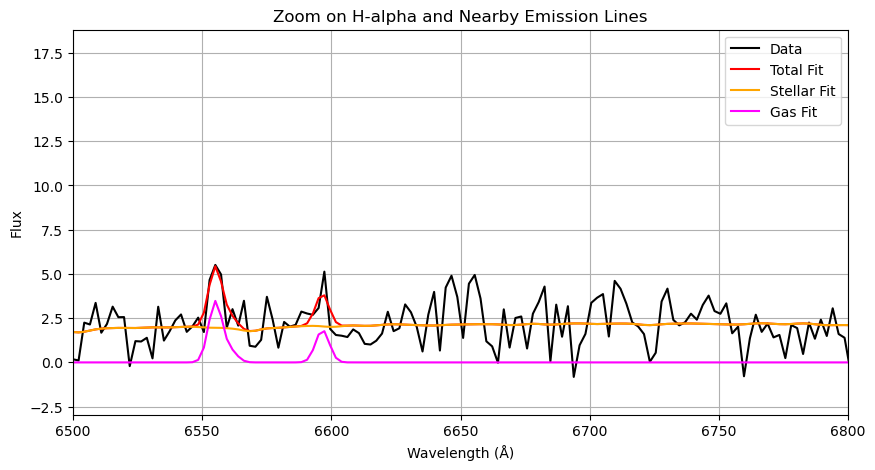

σ (km/s): 1.01

Window centre: 240


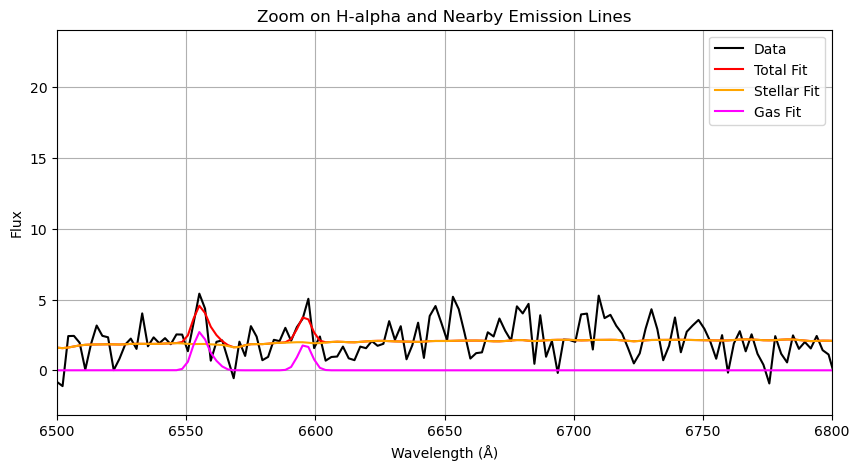

σ (km/s): 1.01

Window centre: 241


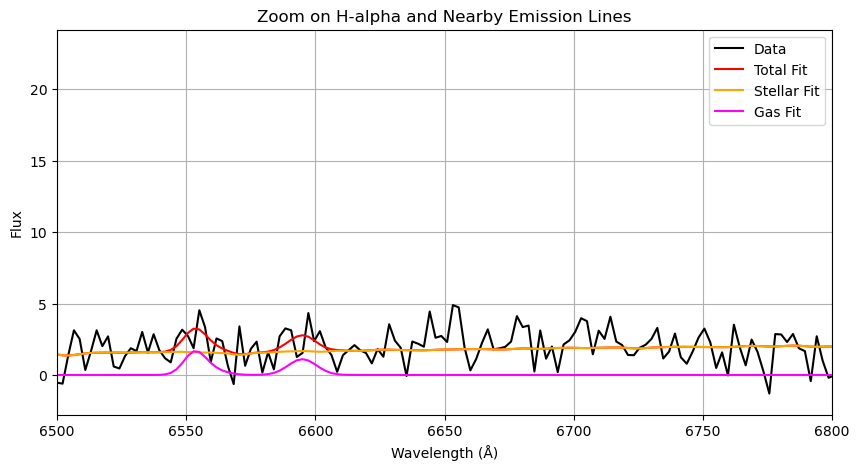

σ (km/s): 150.26

Window centre: 242


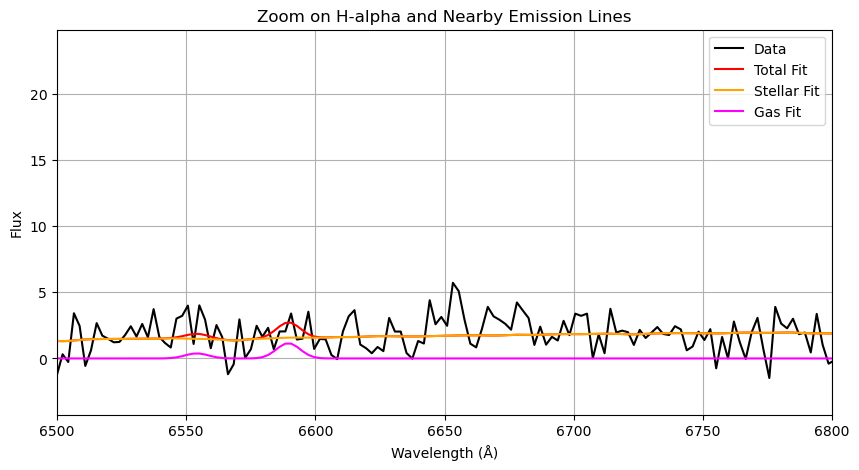

σ (km/s): 154.62

Window centre: 243


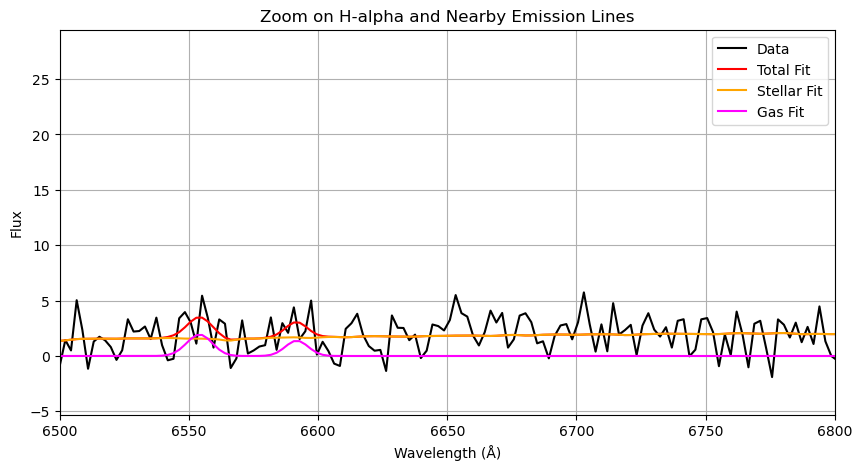

σ (km/s): 188.26

Window centre: 244


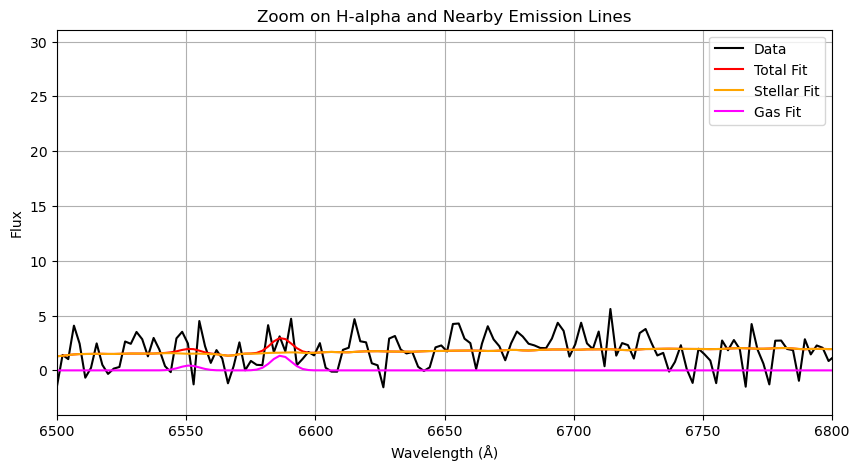

σ (km/s): 200.00

Window centre: 245


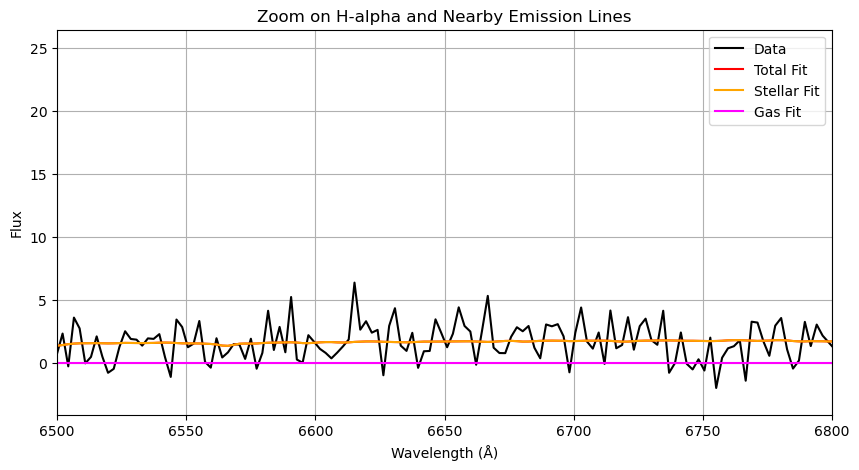

σ (km/s): 200.00

Window centre: 246


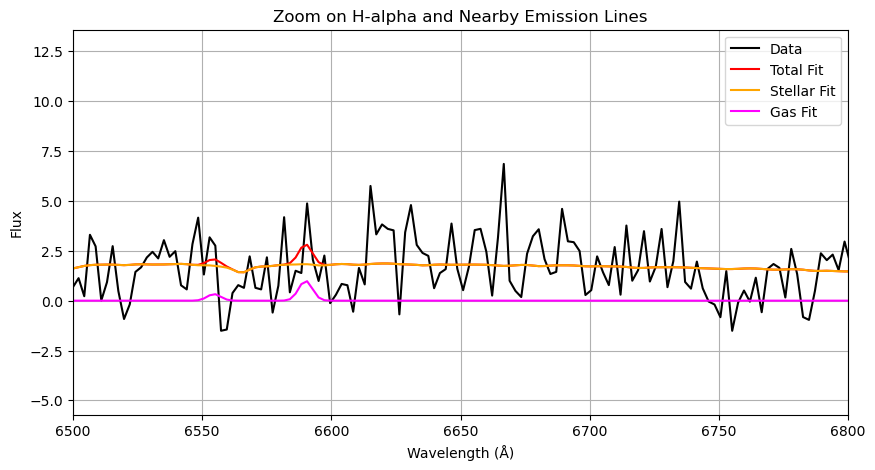

σ (km/s): 200.00

Window centre: 247


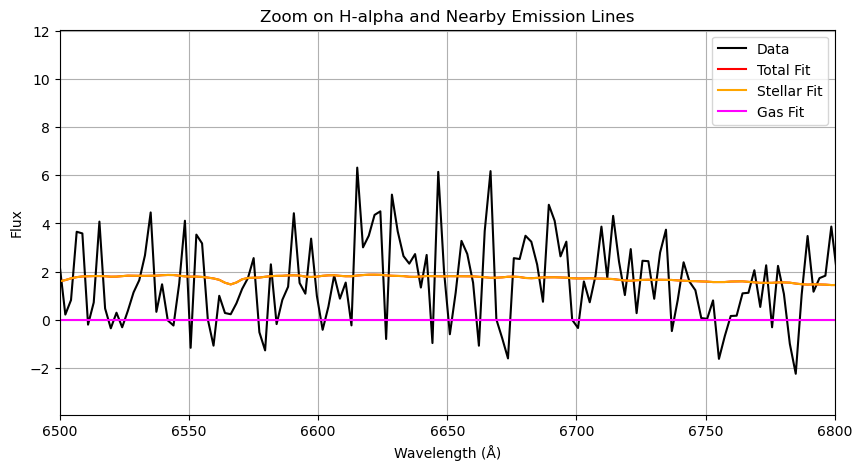

σ (km/s): 200.00



In [4]:
for center, df_rb, pp in results[25:100]:
    # Ensure the function can access 'lam'
    lam_array = df_rb['lam'].values
    plot_ppxf.__globals__['lam'] = lam_array

    print(f"Window centre: {center}")
    plot_ppxf(df_rb, pp)


    # Extract and print the Hα sigma (km/s)
    sigma = pp.sol[1][1]
    print(f"σ (km/s): {sigma:.2f}\n")

In [5]:
centers     = []
velocities  = []; v_errs     = []
dispersions = []; sigma_errs = []
EWs         = []; EW_errs    = []

for center, _, pp in results:
    # --- extract Hα kinematics from the list ---
    sol_gas    = pp.sol[1]
    err_gas    = pp.error[1]
    v_ha, sigma_ha       = sol_gas
    #sigma = np.sqrt(sigma_inst**2 + sigma_ha**2)

    v_ha_err, sigma_ha_err = err_gas

    # find Hα in gas_names (should be idx 0 here)
    idx = np.where(pp.gas_names == "Halpha")[0][0]

    # compute flux, continuum & EW as before
    flux_ha   = pp.gas_flux[idx]
    continuum = pp.bestfit - pp.gas_bestfit
    peak_i    = np.argmax(pp.gas_bestfit_templates[:, idx])
    cont0     = continuum[peak_i]
    cont_err  = pp.noise[peak_i]
    flux_err  = pp.gas_flux_error[idx]

    EW        = flux_ha / cont0
    EW_err    = abs(EW) * np.sqrt((cont_err/cont0)**2 + (flux_err/flux_ha)**2)

    # store
    centers.append(center)
    velocities.append(v_ha)
    v_errs.append(v_ha_err)
    dispersions.append(sigma_ha)
    sigma_errs.append(sigma_ha_err)
    EWs.append(EW)
    EW_errs.append(EW_err)


/var/folders/r3/l94405xd0mq2s62v2swzjq2m0000gn/T/ipykernel_13964/3518839896.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  EW_err    = abs(EW) * np.sqrt((cont_err/cont0)**2 + (flux_err/flux_ha)**2)
/var/folders/r3/l94405xd0mq2s62v2swzjq2m0000gn/T/ipykernel_13964/3518839896.py:27: RuntimeWarning: invalid value encountered in scalar multiply
  EW_err    = abs(EW) * np.sqrt((cont_err/cont0)**2 + (flux_err/flux_ha)**2)


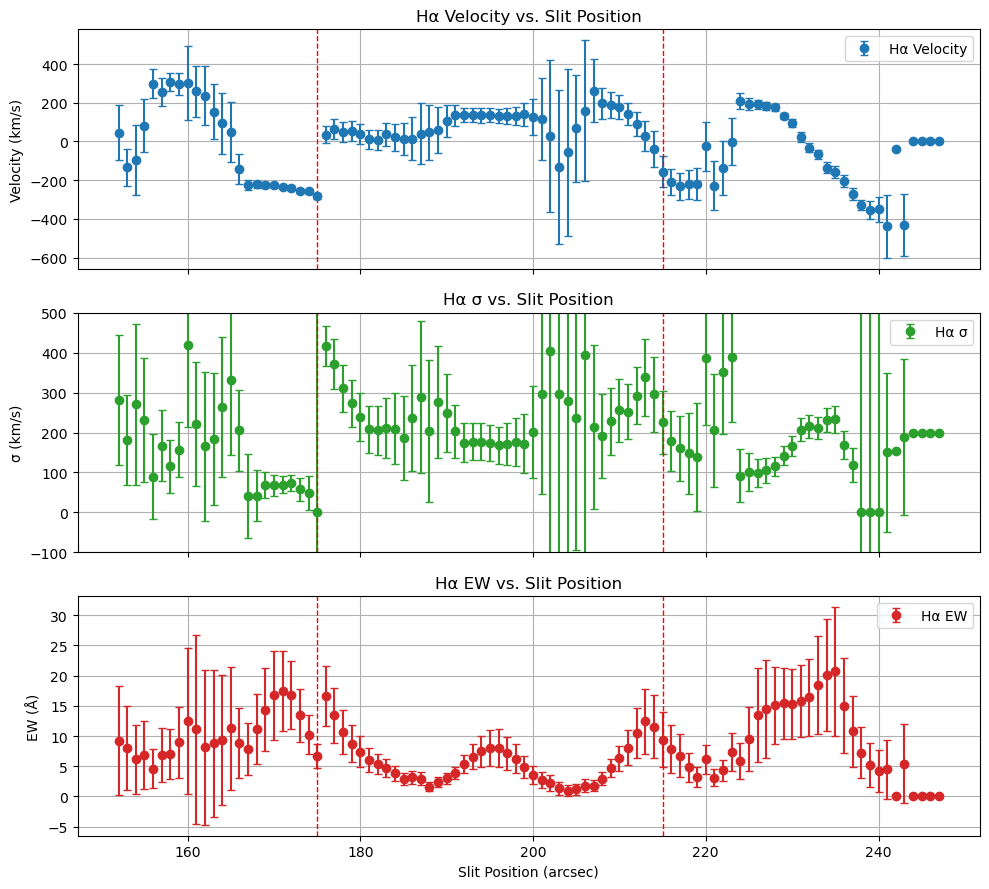

In [6]:
fig, axs = plt.subplots(3,1,figsize=(10,9),sharex=True)

colors = ['#1f77b4', '#2ca02c', '#d62728']  # blue, green, red


# Velocity
axs[0].errorbar(centers, velocities, yerr=v_errs,
                fmt='o', ecolor=colors[0], color=colors[0],
                capsize=3, label='Hα Velocity')
axs[0].set_ylabel("Velocity (km/s)")
axs[0].set_title("Hα Velocity vs. Slit Position")
axs[0].axvline(175, color='red', ls='--', lw=1)
axs[0].axvline(215, color='red', ls='--', lw=1)
axs[0].legend(); axs[0].grid(True)

# Dispersion
axs[1].errorbar(centers, dispersions, yerr=sigma_errs,
                fmt='o', ecolor=colors[1], color=colors[1],
                capsize=3, label='Hα σ')
axs[1].set_ylim(-100,500)
axs[1].set_ylabel("σ (km/s)")
axs[1].set_title("Hα σ vs. Slit Position")
axs[1].axvline(175, color='red', ls='--', lw=1)
axs[1].axvline(215, color='red', ls='--', lw=1)
axs[1].legend(); axs[1].grid(True)

# Equivalent Width
axs[2].errorbar(centers, EWs, yerr = EW_errs,
                fmt='o', ecolor=colors[2], color=colors[2],
                capsize=3, label='Hα EW')
axs[2].set_ylabel("EW (Å)")
axs[2].set_xlabel("Slit Position (arcsec)")
axs[2].set_title("Hα EW vs. Slit Position")
axs[2].axvline(175, color='red', ls='--', lw=1)
axs[2].axvline(215, color='red', ls='--', lw=1)
axs[2].legend(); axs[2].grid(True)

plt.tight_layout()
plt.show()


In [7]:
df = pd.DataFrame({
    'center':        centers,
    'velocity':      velocities,
    'velocity_err':  v_errs,
    'dispersion':    dispersions,
    'dispersion_err': sigma_errs,
    'EW':            EWs,
    'EW_err':        EW_errs
})

# Save to CSV
df.to_csv('../halpha results/SB3_halpha_results.csv', index=False)


In [8]:
blue = "#0072B2" 
red = "#D73027" 
orange = "#cc5500"

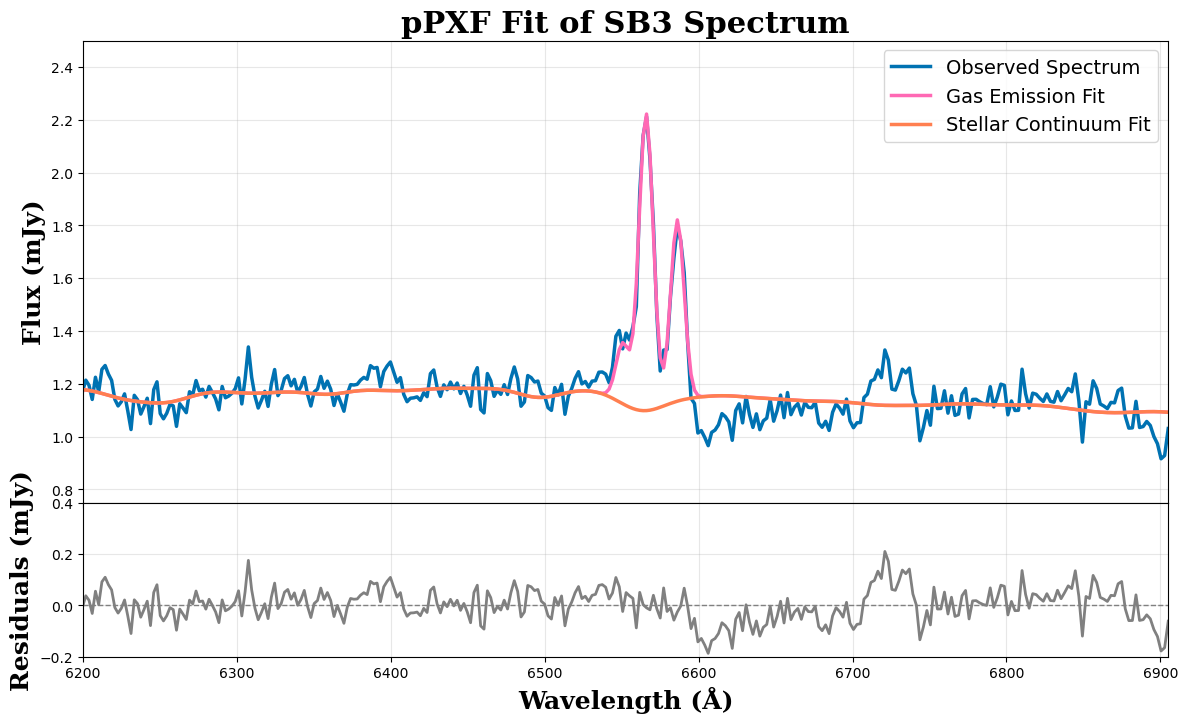

In [9]:
# New color palette

center, df_rb, pp = results[40]
lam   = df_rb["lam"].values
flux  = df_rb["flux"].values

stellar_model = pp.bestfit - pp.gas_bestfit
gas_model     = pp.gas_bestfit
residuals     = flux - (stellar_model + gas_model)

fig, axs = plt.subplots(
    2, 1, figsize=(14, 8), sharex=True,
    gridspec_kw={'height_ratios': [3, 1]}
)

# --- Top panel: spectra + fits ---
axs[0].plot(lam, flux, lw=2.5, label="Observed Spectrum", color=blue)
axs[0].plot(lam, gas_model + stellar_model, lw=2.5, label="Gas Emission Fit", color='hotpink')
axs[0].plot(lam, stellar_model, lw=2.5, label="Stellar Continuum Fit", color='coral')

axs[0].set_xlim(6200, 6905)
axs[0].set_ylim(0.75, 2.5)

axs[0].set_ylabel("Flux (mJy)", fontsize=18, fontweight="bold", family="serif")
axs[0].set_title("pPXF Fit of SB3 Spectrum", fontsize=22, fontweight="bold", family="serif")
axs[0].grid(True, alpha=0.3)
axs[0].legend(fontsize=14)

# --- Bottom panel: residuals ---
axs[1].plot(lam, residuals, lw=2, color='grey')
axs[1].axhline(0, color='grey', ls='--', lw=1)

axs[1].set_ylim(-0.2, 0.4)
axs[1].set_xlabel("Wavelength (Å)", fontsize=18, fontweight="bold", family="serif")
axs[1].set_ylabel("Residuals (mJy)", fontsize=18, fontweight="bold", family="serif")
axs[1].grid(True, alpha=0.3)

# Make panels touch more closely
plt.subplots_adjust(hspace=0)

plt.savefig("ppxf_fit_with_residuals.png", dpi=300, bbox_inches="tight")
plt.show()
